# Importation des librairies et des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Chargement des données
with open('fichier_global.pk', 'rb') as fichier:
     data = pickle.load(fichier)

In [3]:
# Affichage de 5 lignes choisies aléatoirement
data.sample(n=5, random_state=42)

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity
1433,Catalan,Al,dihedral_rhombic_dodecahedron,2.852398,"(5, 0, 0)",0,671,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[75761416.0, 74831256.0, 73304060.0, 71213624....",0
1200,Archimedean,Pd,cuboctahedron,2.757716,"(10, 0, 0)",27.577164,3871,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[31316978000.0, 30228240000.0, 28486173000.0, ...",0
4501,Catalan,Co,rhombic_dodecahedron,2.508815,"(5, 0, 0)",0,671,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[327038370.0, 323932540.0, 318812500.0, 311761...",0
4552,Catalan,Ti,rhombic_dodecahedron,2.870854,"(5, 0, 0)",0,671,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[216972780.0, 214275230.0, 209843580.0, 203772...",0
1867,Platonic,Mn,icosahedron,2.467803,"(3, 0, 0)",7.041059,147,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[13487300.0, 13447457.0, 13381282.0, 13289098....",0


In [4]:
data.dtypes

Solid_class         object
Element             object
Shape               object
Distance           float64
Size_parameters     object
Eq_Radius           object
n_Atoms             object
qmin               float64
qmax                object
qstep              float64
b_iso              float64
q                   object
Intensities         object
polydispersity      object
dtype: object

In [5]:
# Convertir 'Solid_class', 'Element' et 'Shape' en catégorie    
data['Solid_class'] = data['Solid_class'].astype('category')
data['Element'] = data['Element'].astype('category')
data['Shape'] = data['Shape'].astype('category')

# Convertir 'Eq_Radius', 'qmax' en float
data['Eq_Radius'] = pd.to_numeric(data['Eq_Radius'], errors='coerce')
data['qmax'] = pd.to_numeric(data['qmax'], errors='coerce')

# Convertir 'n_Atoms' et 'polydispersity' en int
data['n_Atoms'] = pd.to_numeric(data['n_Atoms'], errors='coerce').astype('Int64')
data['polydispersity'] = pd.to_numeric(data['polydispersity'], errors='coerce').astype('Int64')


In [6]:
data.dtypes

Solid_class        category
Element            category
Shape              category
Distance            float64
Size_parameters      object
Eq_Radius           float64
n_Atoms               Int64
qmin                float64
qmax                  int64
qstep               float64
b_iso               float64
q                    object
Intensities          object
polydispersity        Int64
dtype: object

In [7]:
# Décomposition du tuple 'Size_parameters' en 3 colonnes (float)
for j in range(len(data)):
    for i in range(3):
        a=data.loc[j,"Size_parameters"]
        data.loc[j,f"Size_parameters_{i+1}"]=int(a[i])
data.drop(["Size_parameters"],axis=1,inplace=True)

In [8]:
data.sample(n=5, random_state=42)

,Solid_class,Element,Shape,Distance,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity,Size_parameters_1,Size_parameters_2,Size_parameters_3
1433,Catalan,Al,dihedral_rhombic_dodecahedron,2.852398,0.000000,671,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[75761416.0, 74831256.0, 73304060.0, 71213624....",0,5.0,0.0,0.0
1200,Archimedean,Pd,cuboctahedron,2.757716,27.577164,3871,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[31316978000.0, 30228240000.0, 28486173000.0, ...",0,10.0,0.0,0.0
4501,Catalan,Co,rhombic_dodecahedron,2.508815,0.000000,671,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[327038370.0, 323932540.0, 318812500.0, 311761...",0,5.0,0.0,0.0
4552,Catalan,Ti,rhombic_dodecahedron,2.870854,0.000000,671,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[216972780.0, 214275230.0, 209843580.0, 203772...",0,5.0,0.0,0.0
1867,Platonic,Mn,icosahedron,2.467803,7.041059,147,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[13487300.0, 13447457.0, 13381282.0, 13289098....",0,3.0,0.0,0.0


In [9]:
data.dtypes

Solid_class          category
Element              category
Shape                category
Distance              float64
Eq_Radius             float64
n_Atoms                 Int64
qmin                  float64
qmax                    int64
qstep                 float64
b_iso                 float64
q                      object
Intensities            object
polydispersity          Int64
Size_parameters_1     float64
Size_parameters_2     float64
Size_parameters_3     float64
dtype: object

# Exploration des données qualitatives

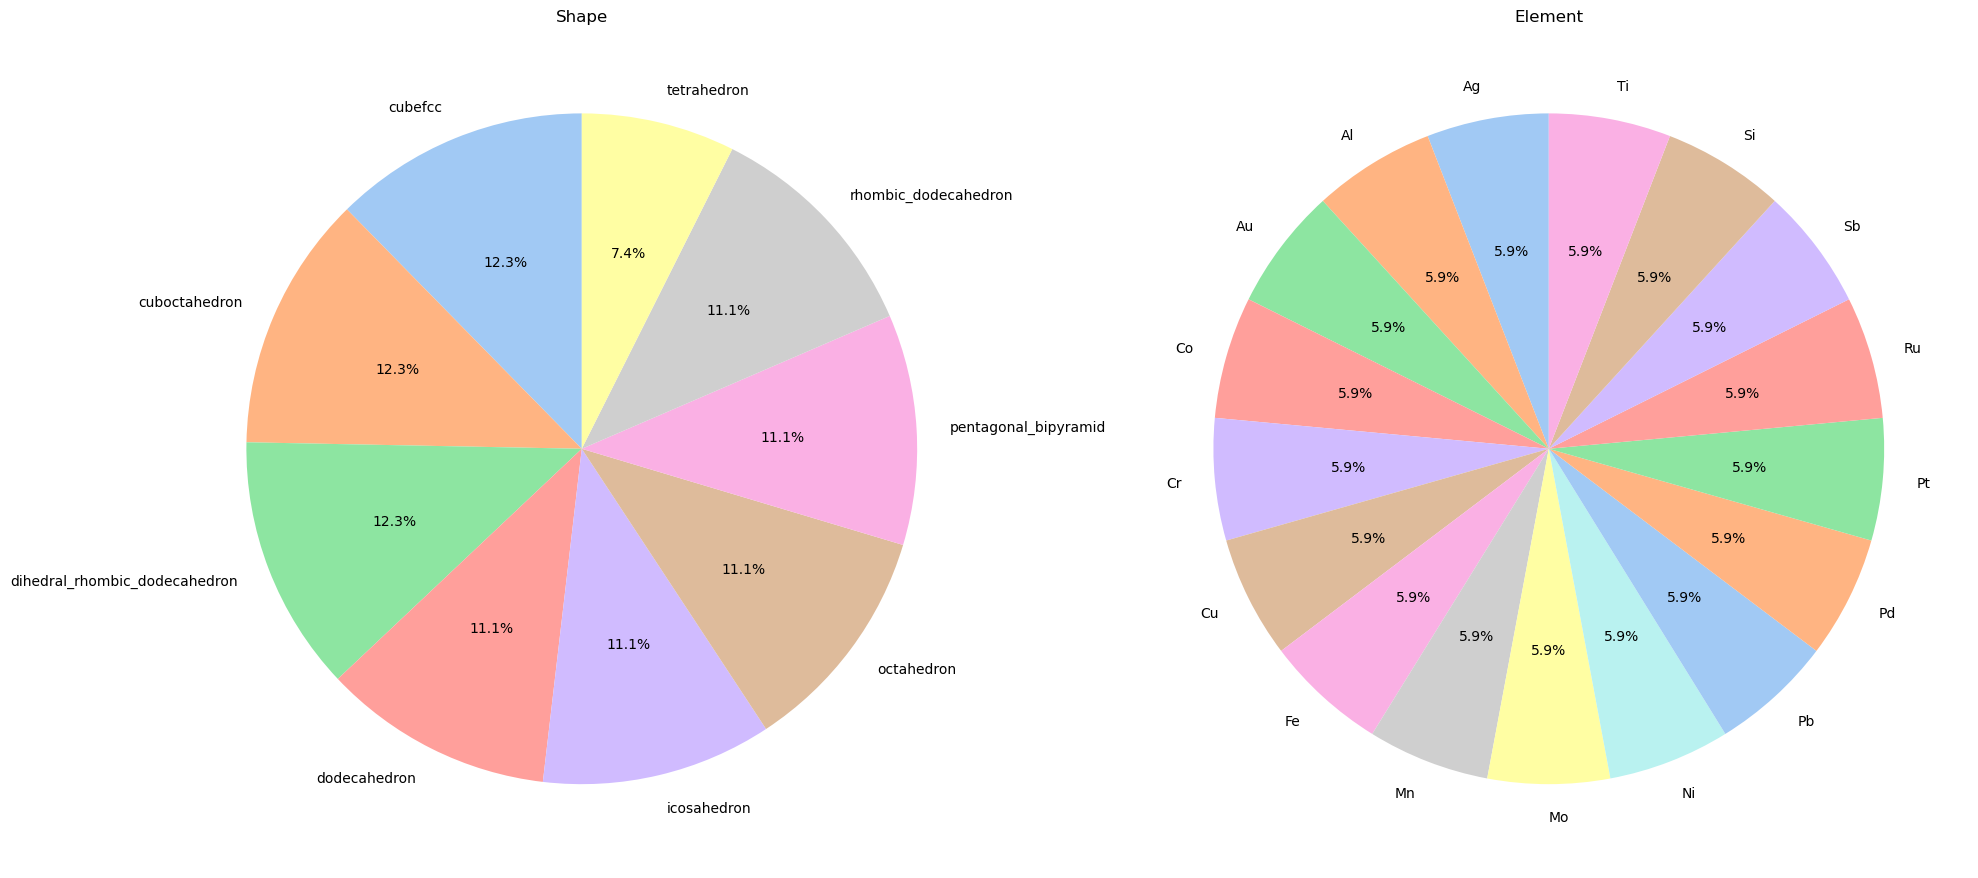

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.pie(data['Shape'].value_counts(),labels=np.unique(data["Shape"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Shape")

plt.subplot(1,2,2)
plt.pie(data['Element'].value_counts(),labels=np.unique(data["Element"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Element")

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'cubefcc'),
  Text(1, 0, 'cuboctahedron'),
  Text(2, 0, 'dihedral_rhombic_dodecahedron'),
  Text(3, 0, 'dodecahedron'),
  Text(4, 0, 'icosahedron'),
  Text(5, 0, 'octahedron'),
  Text(6, 0, 'pentagonal_bipyramid'),
  Text(7, 0, 'rhombic_dodecahedron'),
  Text(8, 0, 'tetrahedron')])

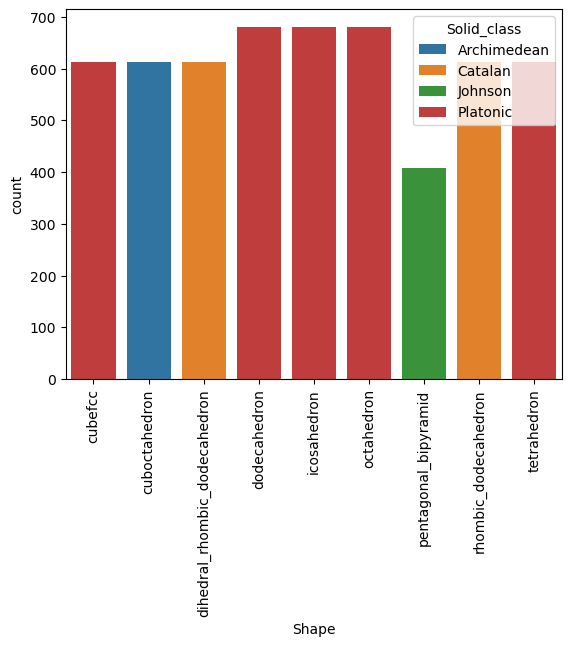

In [ ]:
#Relation entre Solid_class et Shape
sns.countplot(x=data["Shape"],hue=data["Solid_class"])
plt.xticks(rotation=90)

**==> Les Solid_class sont liés à des shape specifiques. Exemple les nanoparticules à shape pentagonal_bipyramid ont la solid class Johnson**

<Axes: xlabel='Element', ylabel='Solid_class'>

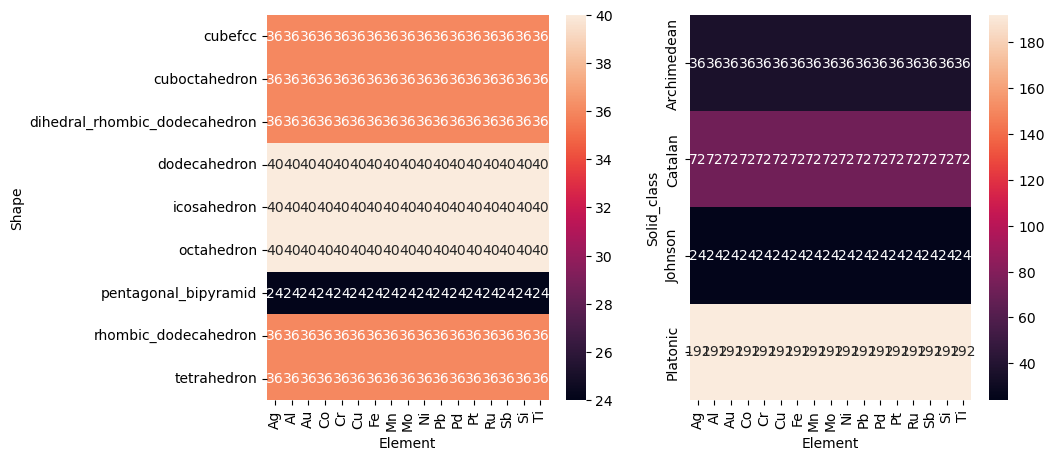

In [ ]:
plt.figure(figsize=(10,5))

#table de contigence Shape Element
plt.subplot(121)
contig=pd.crosstab(data["Shape"],data["Element"])
sns.heatmap(contig,fmt='d',annot=True)

#table de contigence Solid_class Element
plt.subplot(122)
contig=pd.crosstab(data["Solid_class"],data["Element"])
sns.heatmap(contig,fmt='d',annot=True)

**==> les elements peuvent avoir n'importe quelle Shape et Solid Classe**

# Exploration des données quantitatives

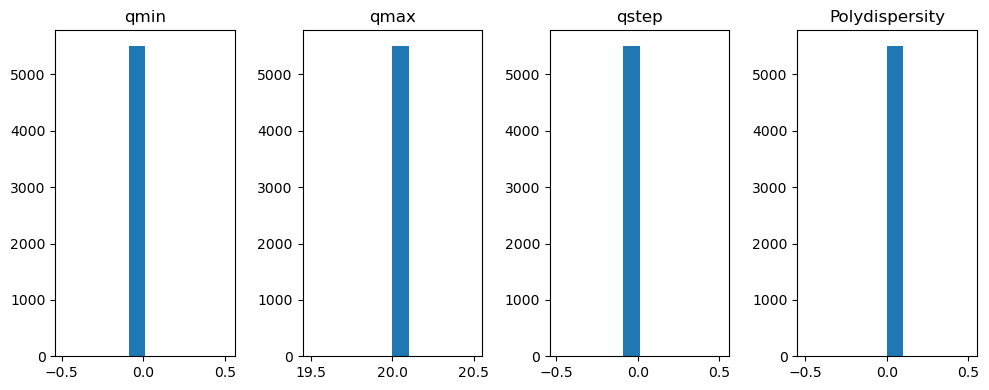

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.hist(data["qmin"])
plt.title("qmin")

plt.subplot(1,4,2)
plt.hist(data["qmax"])
plt.title("qmax")

plt.subplot(1,4,3)
plt.hist(data["qstep"])
plt.title("qstep")

plt.subplot(1,4,4)
plt.hist(data["polydispersity"])
plt.title("Polydispersity")

plt.tight_layout()
plt.show()

In [15]:
data_num=data.drop(["Solid_class","Shape","Element","polydispersity","qstep","qmax","qmin","q","Intensities"],axis=1)
data_num.head()

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3
0,2.888885,7.076294,63,0.1,2.0,0.0,0.0
1,2.888885,7.076294,63,0.3,2.0,0.0,0.0
2,2.888885,7.076294,63,0.5,2.0,0.0,0.0
3,2.888885,7.076294,63,0.9,2.0,0.0,0.0
4,2.852398,6.986920,63,0.1,2.0,0.0,0.0


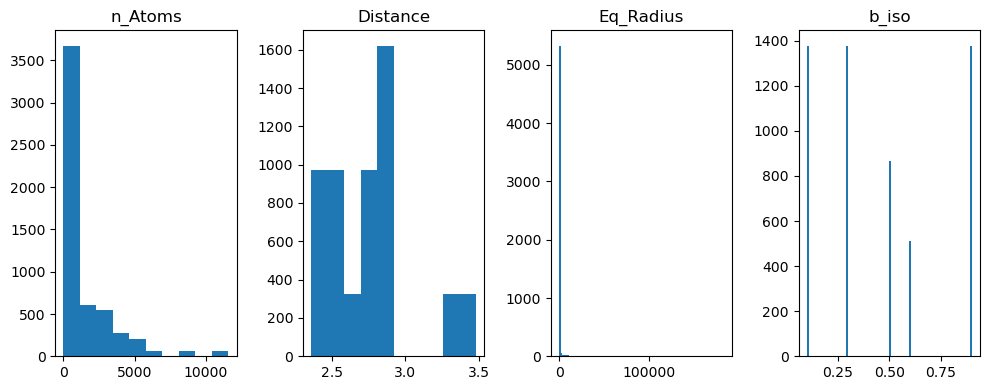

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.hist(data["n_Atoms"])
plt.title("n_Atoms")

plt.subplot(1,4,2)
plt.hist(data["Distance"])
plt.title("Distance")

plt.subplot(1,4,3)
plt.hist(data["Eq_Radius"], bins=100)
plt.title("Eq_Radius")

plt.subplot(1,4,4)
plt.hist(data["b_iso"], bins=100)
plt.title("b_iso")

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


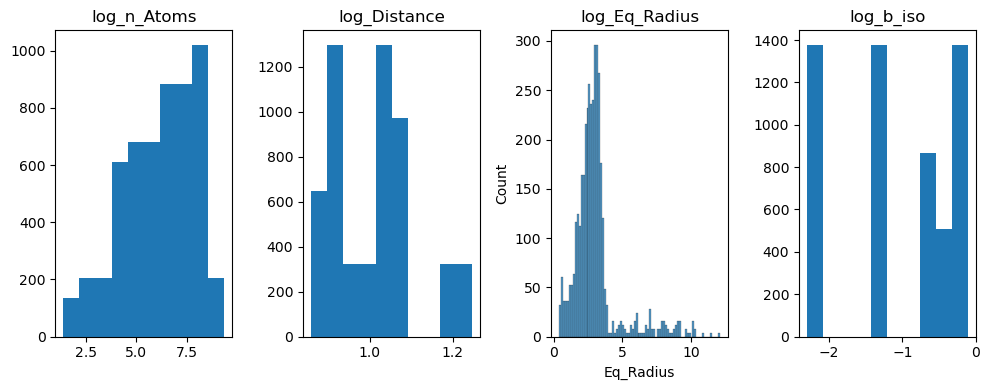

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.hist(np.log(data["n_Atoms"]))
plt.title("log_n_Atoms")

plt.subplot(1,4,2)
plt.hist(np.log(data["Distance"]))
plt.title("log_Distance")

plt.subplot(1,4,3)
sns.histplot(np.log(data["Eq_Radius"]))
plt.title("log_Eq_Radius")

plt.subplot(1,4,4)
plt.hist(np.log(data["b_iso"]))
plt.title("log_b_iso")

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

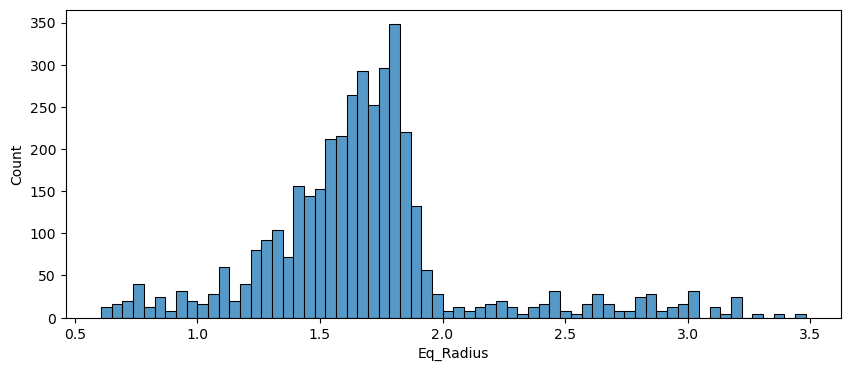

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(np.sqrt(np.log(data["Eq_Radius"])))
plt.plot

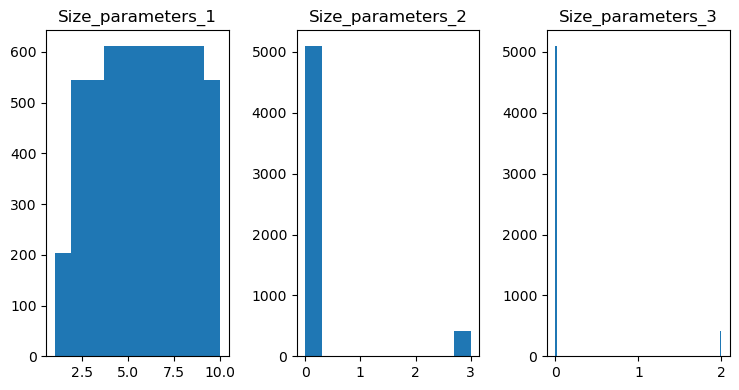

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.hist(data_num["Size_parameters_1"])
plt.title("Size_parameters_1")

plt.subplot(1,4,2)
plt.hist(data_num["Size_parameters_2"])
plt.title("Size_parameters_2")

plt.subplot(1,4,3)
plt.hist(data_num["Size_parameters_3"], bins=100)
plt.title("Size_parameters_3")

plt.tight_layout()
plt.show()

# Analyse Bidimentionnelle: Matrice des correlations

<Axes: >

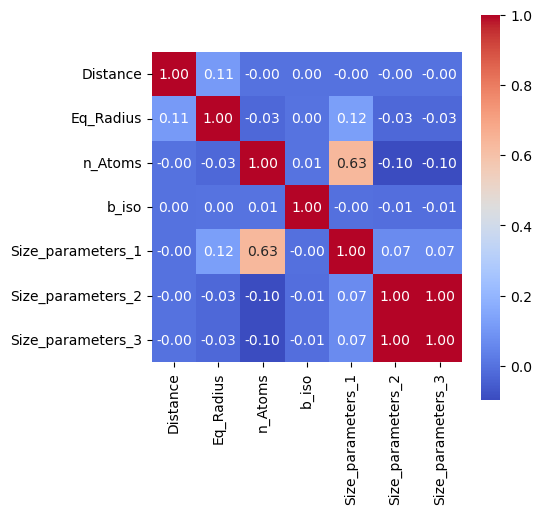

In [ ]:
corr_matrix = data_num.corr()

# Générer la heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

**Il y a une forte corrélation enre n\_Atoms et Size\_parameter\_1 que nous cherchons à prédire**

# PCA sur data_num

Variance expliquée par chaque composante: [0.28853016 0.23415829 0.15894473 0.14283943 0.12822484 0.04730255
 0.        ]
Variance expliquée totale: 1.0


Text(0, 0.5, 'explained_variance_ratio')

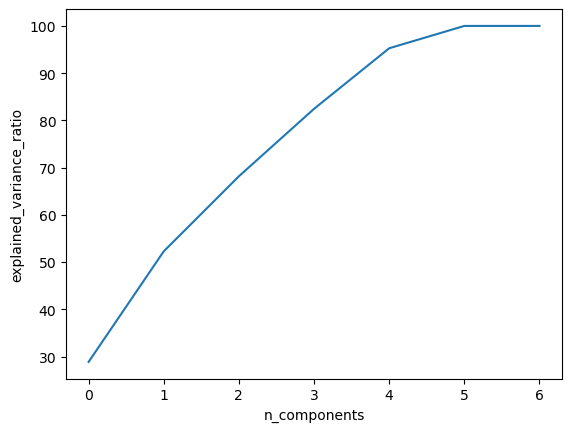

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Étape 2 : Appliquer PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Afficher la variance expliquée par chaque composante
print(f'Variance expliquée par chaque composante: {pca.explained_variance_ratio_}')
print(f'Variance expliquée totale: {sum(pca.explained_variance_ratio_)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")


## Cercle des correlations

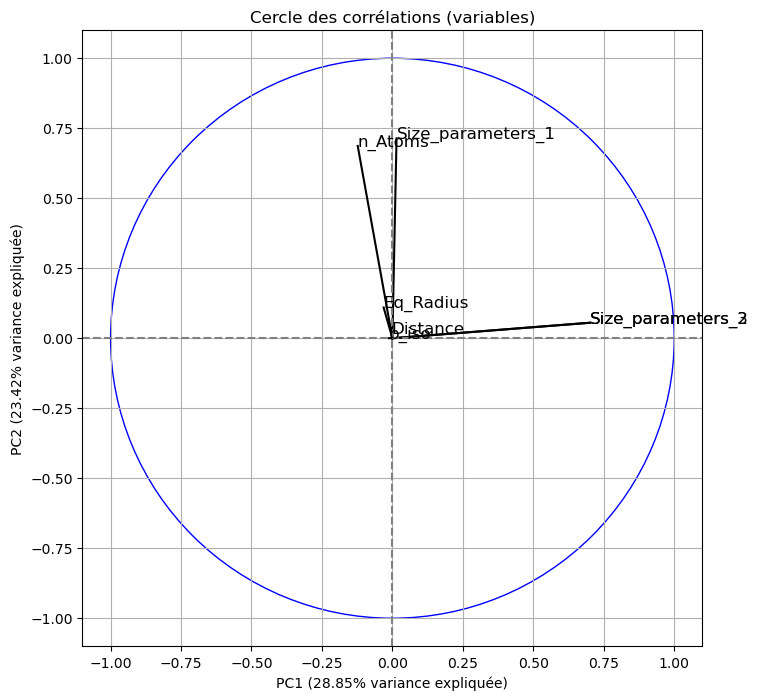

In [ ]:
pcs = pca.components_

plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

**La PC1==> Size_parameter_2** \
**La PC2==> Size_parameter_1 + log_n_atoms (qui sont fortement correlés)**

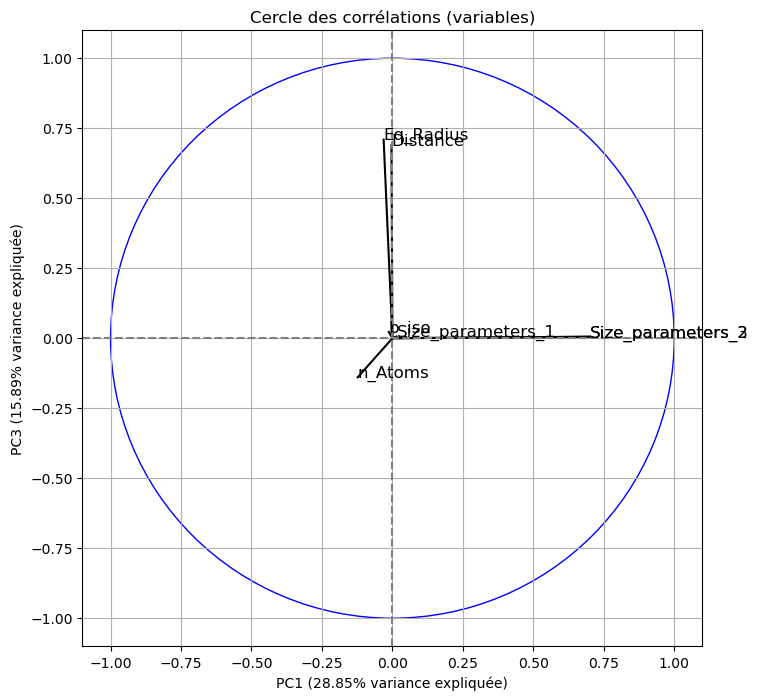

In [ ]:
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[2, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

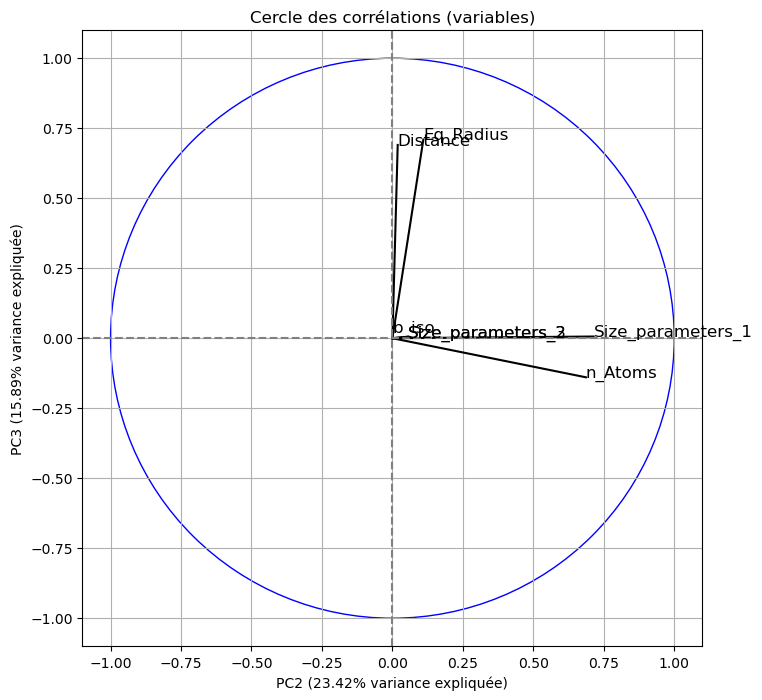

In [ ]:
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

**Donc :** \
**PC1 --> Size_parameters_2 et 3**\
**PC2 --> Size_parameters_1 et n_Atoms**\
**PC3 --> Distance et Eq_radius**

## Graph des individus avec habillage= Solid_class

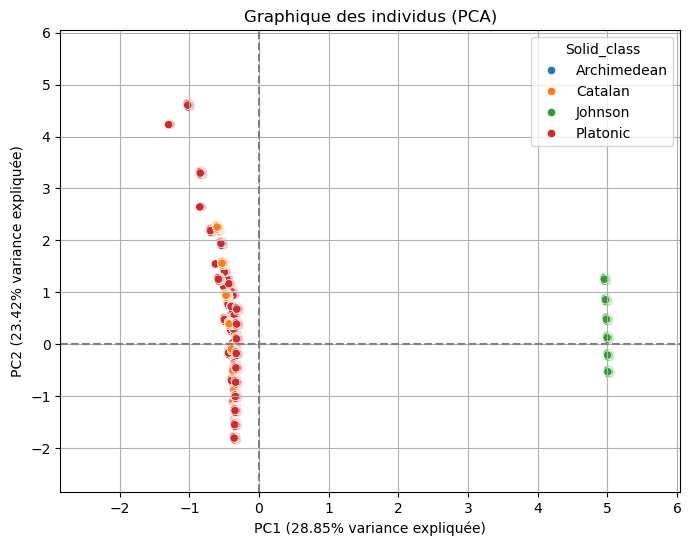

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data["Solid_class"])

#sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])  # Si labels présents

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

**La positions des particules à solidclass=Johnson et l'analyse sur le cercle des correlations montrent qu'ils'ont un Size_parameter_2 plus important , n_atoms et Size_parameter_1  faibles par rapport aux autres. Confirmation avec les 3 figures ci dessous**

Text(0, 0.5, 'n_Atoms')

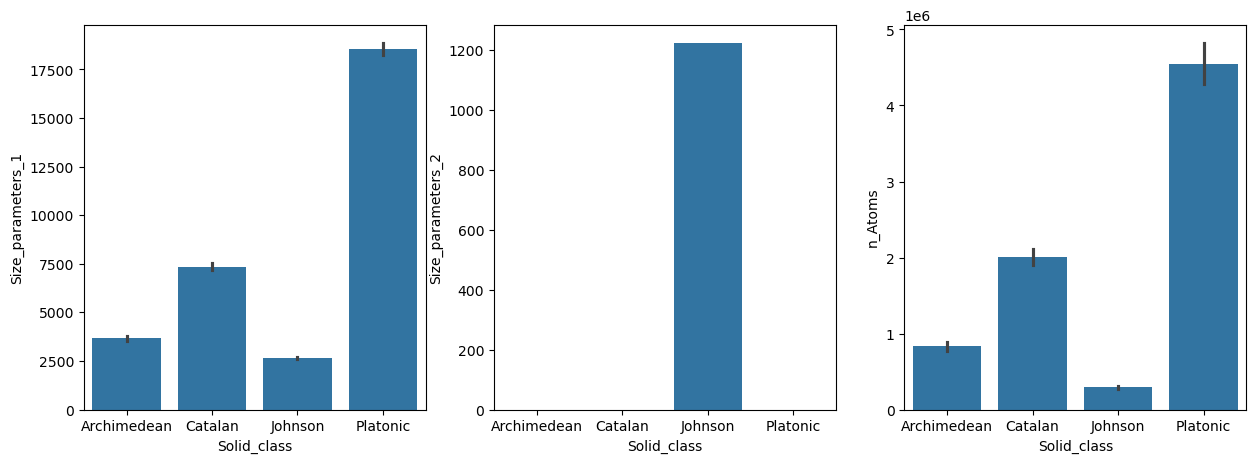

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.barplot(x=data["Solid_class"],y=data["Size_parameters_1"],estimator=np.sum)
plt.xlabel("Solid_class")
plt.ylabel("Size_parameters_1")

plt.subplot(132)
sns.barplot(x=data["Solid_class"],y=data["Size_parameters_2"],estimator=np.sum)
plt.xlabel("Solid_class")
plt.ylabel("Size_parameters_2")

plt.subplot(133)
sns.barplot(x=data["Solid_class"],y=data["n_Atoms"],estimator=np.sum)
plt.xlabel("Solid_class")
plt.ylabel("n_Atoms")

## Graph des individus avec habillage= Shape

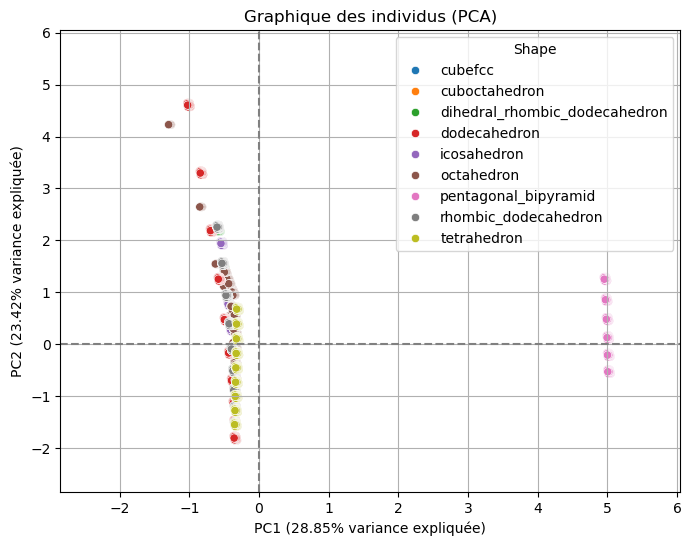

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data["Shape"])

#sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])  # Si labels présents

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

**La positions des particules à Shape=Pentagonal_bipyramid et l'analyse precedente montrent qu'ils'ont un size_parameter_2 plus important , n_atoms et size_param1  faible par rapport aux autres. Confirmation avec les 3 figures ci dessous. Ils correspondent aux nanoparticules à solidClass=Johnson**



Text(0, 0.5, 'n_Atoms')

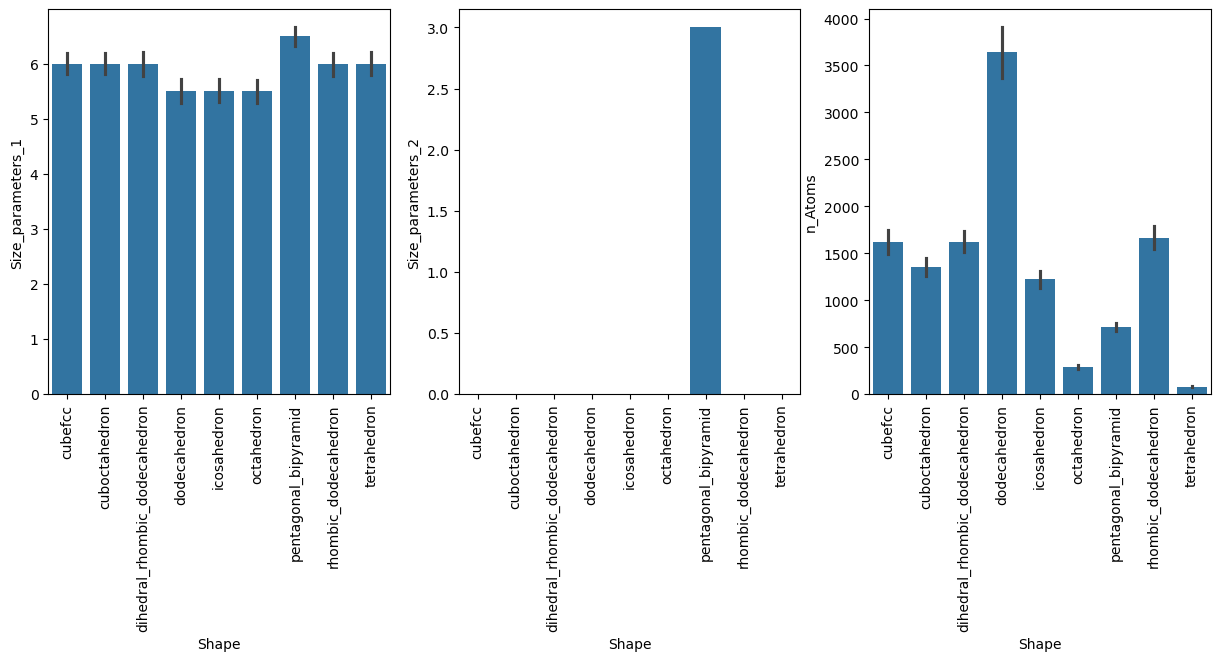

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.barplot(x=data["Shape"],y=data["Size_parameters_1"],estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("Size_parameters_1")

plt.subplot(132)
sns.barplot(x=data["Shape"],y=data["Size_parameters_2"],estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("Size_parameters_2")

plt.subplot(133)
sns.barplot(x=data["Shape"],y=data["n_Atoms"],estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("n_Atoms")

# Création d'un dataset avec uniquement les intensités

In [17]:
intensities = data.Intensities
intensities_np = np.vstack(intensities.values)
intensities_df = pd.DataFrame(intensities_np)
intensities_df

,0,1,2,3,4,5,6,7,8,9,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
0,8.760072e+06,8.737556e+06,8.700139e+06,8647997.0,8.581356e+06,8.500521e+06,8.405848e+06,8297766.00,8176743.5,8.043316e+06,...,5504.801270,5504.597168,5503.507324,5501.530273,5498.683105,5494.964844,5490.397949,5484.985840,5478.751953,5471.714355
1,8.760070e+06,8.737548e+06,8.700119e+06,8647962.0,8.581303e+06,8.500444e+06,8.405745e+06,8297633.00,8176578.0,8.043116e+06,...,5267.766602,5263.145020,5258.204102,5252.941895,5247.367188,5241.477539,5235.287109,5228.791504,5222.004395,5214.934082
2,8.760067e+06,8.737539e+06,8.700101e+06,8647928.0,8.581249e+06,8.500368e+06,8.405643e+06,8297501.00,8176413.5,8.042916e+06,...,5180.836426,5174.684570,5168.423340,5162.050293,5155.571289,5148.981934,5142.292969,5135.496582,5128.603027,5121.615234
3,8.760063e+06,8.737522e+06,8.700062e+06,8647859.0,8.581142e+06,8.500216e+06,8.405438e+06,8297237.00,8176083.5,8.042516e+06,...,5137.264160,5130.401855,5123.537109,5116.666504,5109.794434,5102.915527,5096.037598,5089.151367,5082.264160,5075.376465
4,6.700418e+05,6.683341e+05,6.654966e+05,661542.0,6.564878e+05,6.503571e+05,6.431766e+05,634978.75,625799.0,6.156782e+05,...,124.255180,124.792656,125.320938,125.838524,126.344070,126.835983,127.313080,127.774475,128.219193,128.646286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,9.469251e+06,9.422357e+06,9.344688e+06,9236972.0,9.100207e+06,8.935659e+06,8.744831e+06,8529454.00,8291451.5,8.032926e+06,...,505.604095,505.211121,504.831116,504.460999,504.103180,503.755035,503.416077,503.086365,502.765472,502.451233
5504,2.336461e+07,2.319472e+07,2.291418e+07,22526814.0,2.203790e+07,2.145398e+07,2.078283e+07,20033198.00,19214700.0,1.833759e+07,...,2605.535156,2589.801270,2575.012451,2561.586426,2549.911133,2540.307861,2533.056641,2528.360107,2526.379639,2527.180420
5505,2.336460e+07,2.319470e+07,2.291413e+07,22526724.0,2.203776e+07,2.145378e+07,2.078257e+07,20032874.00,19214306.0,1.833713e+07,...,2546.387207,2538.134766,2530.240234,2522.856689,2516.123535,2510.155273,2505.053711,2500.886230,2497.714111,2495.553223
5506,2.336459e+07,2.319468e+07,2.291408e+07,22526632.0,2.203762e+07,2.145359e+07,2.078231e+07,20032550.00,19213914.0,1.833667e+07,...,2524.695312,2519.205566,2513.853516,2508.696045,2503.782227,2499.152832,2494.845947,2490.881348,2487.285889,2484.059082


In [9]:
intensities_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
count,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,...,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03
mean,1.178510e+10,1.111519e+10,1.008568e+10,8.809469e+09,7.414240e+09,6.021437e+09,4.729419e+09,3.603770e+09,2.675560e+09,1.946202e+09,...,1.282724e+05,1.281593e+05,1.278266e+05,1.272725e+05,1.265162e+05,1.255968e+05,1.245682e+05,1.234927e+05,1.224393e+05,1.214789e+05
std,5.170697e+10,4.751019e+10,4.126468e+10,3.389585e+10,2.636439e+10,1.946955e+10,1.372187e+10,9.315210e+09,6.180497e+09,4.083782e+09,...,3.506717e+05,3.516184e+05,3.515322e+05,3.501128e+05,3.473349e+05,3.434394e+05,3.388500e+05,3.340614e+05,3.295275e+05,3.255942e+05
min,2.703058e+03,2.702033e+03,2.700327e+03,2.697941e+03,2.694875e+03,2.691133e+03,2.686717e+03,2.681630e+03,2.675874e+03,2.669456e+03,...,8.020738e+00,8.014660e+00,8.008589e+00,8.002529e+00,7.996479e+00,7.990436e+00,7.984404e+00,7.978378e+00,7.972362e+00,7.966354e+00
25%,1.884965e+07,1.880821e+07,1.873934e+07,1.864327e+07,1.852037e+07,1.819329e+07,1.782383e+07,1.765427e+07,1.728315e+07,1.687336e+07,...,3.375549e+03,3.371134e+03,3.381430e+03,3.366419e+03,3.346160e+03,3.344850e+03,3.366921e+03,3.363734e+03,3.357413e+03,3.354775e+03
50%,3.516981e+08,3.483658e+08,3.428755e+08,3.344849e+08,3.250970e+08,3.139379e+08,3.011616e+08,2.870356e+08,2.633629e+08,2.386029e+08,...,1.811667e+04,1.812845e+04,1.819807e+04,1.818493e+04,1.808590e+04,1.802396e+04,1.796721e+04,1.798267e+04,1.817225e+04,1.816868e+04
75%,4.395840e+09,4.307805e+09,4.171580e+09,3.994477e+09,3.776442e+09,3.457733e+09,3.074675e+09,2.737245e+09,2.386875e+09,1.939923e+09,...,8.272385e+04,8.325846e+04,8.339749e+04,8.471039e+04,8.418908e+04,8.548894e+04,8.544762e+04,8.410533e+04,8.367578e+04,8.330004e+04
max,8.645015e+11,7.645834e+11,6.475733e+11,5.305911e+11,4.119535e+11,2.980664e+11,1.985599e+11,1.194247e+11,6.267702e+10,3.326309e+10,...,4.593990e+06,4.578314e+06,4.543863e+06,4.494718e+06,4.439596e+06,4.386294e+06,4.337138e+06,4.288309e+06,4.233648e+06,4.170356e+06


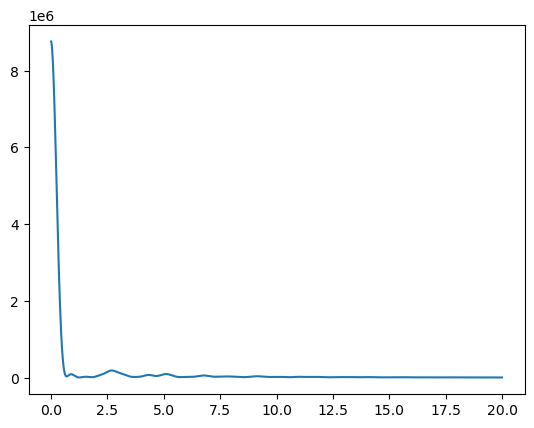

In [15]:
plt.Figure(figsize=(10, 5))
plt.plot(data.q[0],data.Intensities[0])
plt.show()

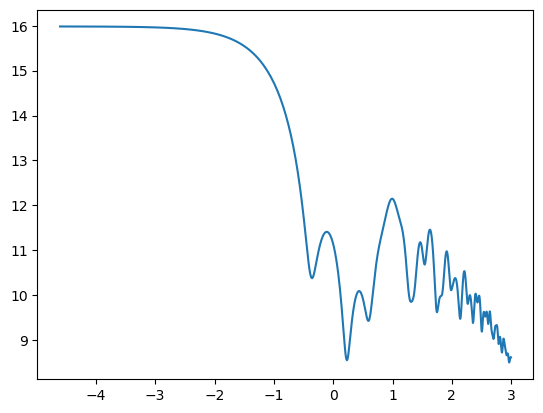

In [16]:
plt.Figure(figsize=(10, 5))
plt.plot(np.log(data.q[0]),np.log(data.Intensities[0]))
plt.show()

# PCA sur les données d'intensités

Variance expliquée par chaque composante: [7.9976380e-01 4.0372819e-02 3.4222975e-02 ... 2.5320626e-16 2.0455451e-16
 2.3646594e-17]
Variance expliquée totale: 1.0000001459476333


Text(0, 0.5, 'explained_variance_ratio')

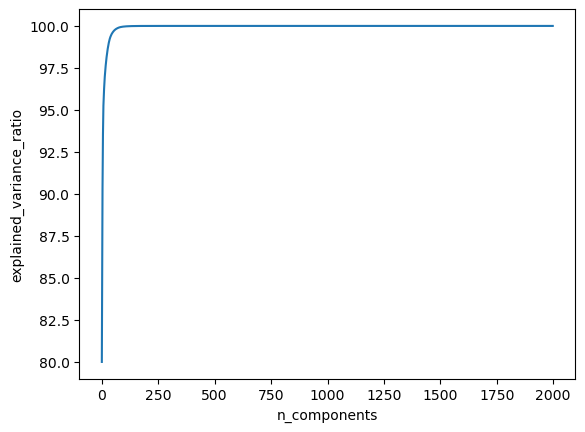

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(intensities_df)

# Étape 2 : Appliquer PCA
pca = PCA()  
data_pca = pca.fit_transform(data_scaled)

# Afficher la variance expliquée par chaque composante
print(f'Variance expliquée par chaque composante: {pca.explained_variance_ratio_}')
print(f'Variance expliquée totale: {sum(pca.explained_variance_ratio_)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")

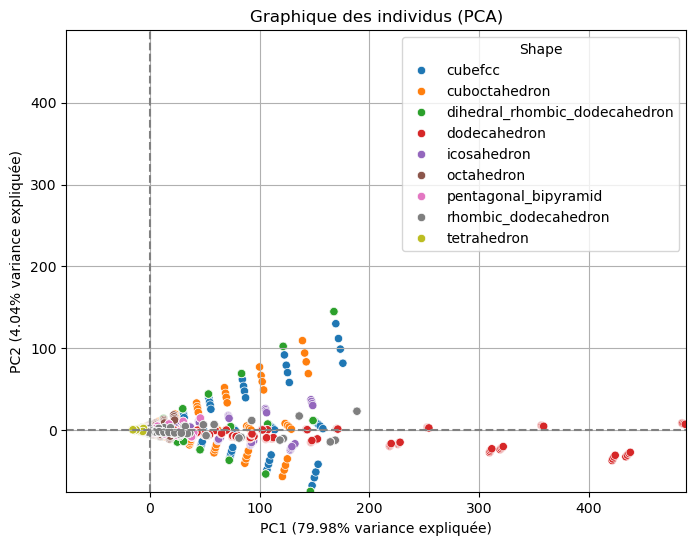

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(intensities_df)-1,"Shape"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

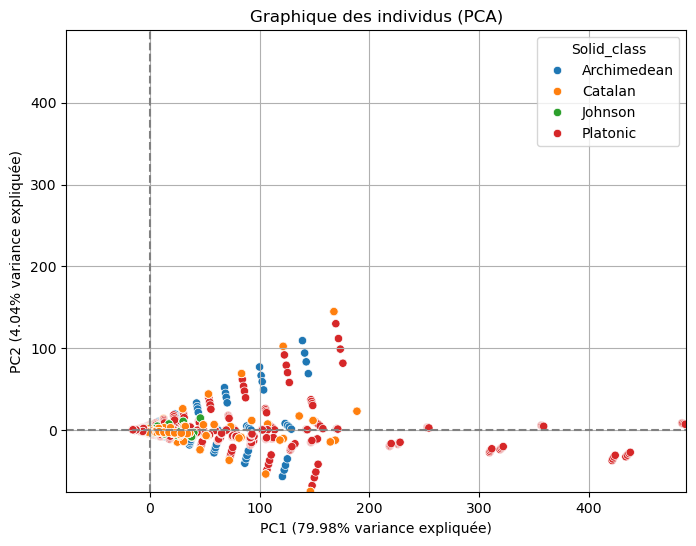

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(intensities_df)-1,"Solid_class"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

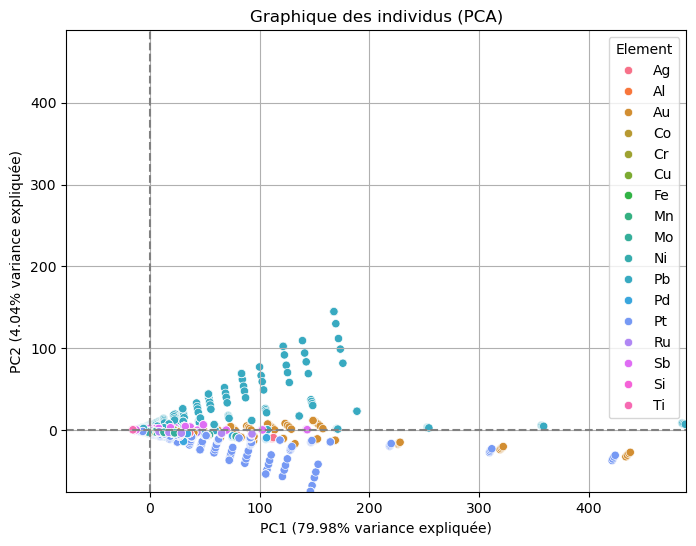

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(intensities_df)-1,"Element"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

In [ ]:
data["n_Atoms"] = data["n_Atoms"].astype('category')
data["n_Atoms"]

0        63
1        63
2        63
3        63
4        63
       ... 
5503    220
5504    220
5505    220
5506    220
5507    220
Name: n_Atoms, Length: 5508, dtype: category
Categories (67, Int64): [4, 6, 10, 13, ..., 4785, 6137, 8569, 11571]

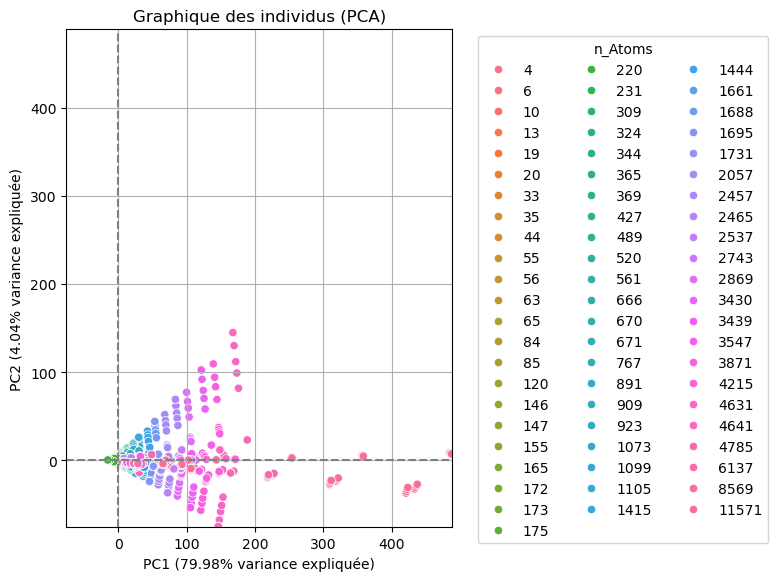

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(data)-1,"n_Atoms"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.legend(title="n_Atoms",bbox_to_anchor=(1.05, 1), loc='upper left', ncols=3)
plt.grid(True)
plt.tight_layout()
plt.show()

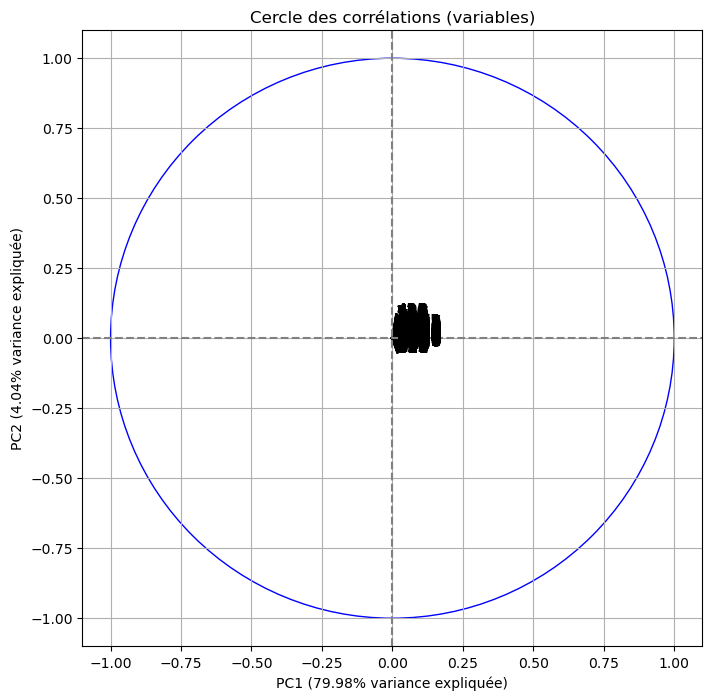

In [ ]:
pcs = pca.components_

plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, intensities_df.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

# Régression Ridge pour prédire la taille (n_Atoms, size_parameter_1 et eq_radius)

## Transformation des outputs et creation fonction Q2 score

In [41]:
data_num=data.drop(["Solid_class","Shape","Element","polydispersity","qstep","qmax","qmin","q","Intensities"],axis=1)

# Avant transformation
print("Valeurs minimales de Eq_Radius :", data_num["Eq_Radius"].min())

# Après np.log
#log_values = np.log(data_num["Eq_Radius"])

# Filtrer les valeurs strictement positives avant np.log
#filtered_values = data_num["Eq_Radius"][data_num["Eq_Radius"] > 0]
#log_values = np.log(filtered_values)

# Appliquer np.log seulement aux valeurs positives
data_num["Log_Eq_Radius"] = np.where(
    data_num["Eq_Radius"] > 0,  # Condition
    np.log(data_num["Eq_Radius"]),  # Si la condition est vraie
    data_num["Eq_Radius"]  # Si la condition est fausse
)

print("Valeurs minimales après log :", data_num["Log_Eq_Radius"].min())

# Après np.sqrt
sqrt_log_values = np.sqrt(data_num["Log_Eq_Radius"])
print("Y a-t-il des NaN ?", np.isnan(sqrt_log_values).any())

Valeurs minimales de Eq_Radius : 0.0
Valeurs minimales après log : 0.0
Y a-t-il des NaN ? False


/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
# Transformation des outputs pour qu'ils aient une distribution plus centrée et gaussienne
data_num["log_n_Atoms"]=np.log(data["n_Atoms"])
data_num["sqrt_log_eq_radius"] = np.sqrt(data_num["Log_Eq_Radius"])
data_num.head()

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3,Log_Eq_Radius,log_n_Atoms,sqrt_log_eq_radius
0,2.888885,7.076294,63,0.1,2.0,0.0,0.0,1.95675,4.143135,1.398839
1,2.888885,7.076294,63,0.3,2.0,0.0,0.0,1.95675,4.143135,1.398839
2,2.888885,7.076294,63,0.5,2.0,0.0,0.0,1.95675,4.143135,1.398839
3,2.888885,7.076294,63,0.9,2.0,0.0,0.0,1.95675,4.143135,1.398839
4,2.852398,6.986920,63,0.1,2.0,0.0,0.0,1.94404,4.143135,1.394288


In [43]:
data_num.describe()

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3,Log_Eq_Radius,log_n_Atoms,sqrt_log_eq_radius
count,5508.000000,5508.000000,5508.0,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.0,5508.000000
mean,2.750955,563.446863,1394.666667,0.459259,5.851852,0.222222,0.148148,2.132533,6.115861,1.185640
std,0.284838,6148.634840,1984.135786,0.298801,2.658149,0.785746,0.523830,1.998942,1.789892,0.852597
min,2.361737,0.000000,4.0,0.100000,1.000000,0.000000,0.000000,0.000000,1.386294,0.000000
25%,2.508815,0.000000,147.0,0.250000,4.000000,0.000000,0.000000,0.000000,4.990433,0.000000
50%,2.757716,9.980943,561.0,0.400000,6.000000,0.000000,0.000000,2.300678,6.329721,1.516798
75%,2.870854,21.842752,1731.0,0.675000,8.000000,0.000000,0.000000,3.083869,7.456455,1.756095
max,3.478965,183647.935917,11571.0,0.900000,10.000000,3.000000,2.000000,12.120776,9.356257,3.481490


In [44]:
# Compter les NaN par ligne
nan_per_col = data_num.isna().sum(axis=0)
print(nan_per_col)

Distance              0
Eq_Radius             0
n_Atoms               0
b_iso                 0
Size_parameters_1     0
Size_parameters_2     0
Size_parameters_3     0
Log_Eq_Radius         0
log_n_Atoms           0
sqrt_log_eq_radius    0
dtype: int64


In [45]:
def q2_score(y_true, y_pred, y_train_mean):
    """
    Calcule le Q^2 pour un ensemble de test.
    
    Parameters:
    ----------
    y_true : array-like
        Les vraies valeurs de la cible (ensemble de test).
    y_pred : array-like
        Les valeurs prédites par le modèle (ensemble de test).
    y_train_mean : float
        La moyenne des cibles dans l'ensemble d'entraînement.
        
    Returns:
    -------
    float
        Le score Q^2 (proche de 1: bonne prédiction sur de nouvelles données, =0 le modèle n'apporte rien par / à la moyenne, <0 le modèle est pire que la moyenne).
    """
    numerator = sum((y_true - y_pred)**2)   
    denominator = sum((y_true - y_train_mean) ** 2)
    return 1 - numerator / denominator


## Modèle Ridge pour prédire les outputs simultanement

In [46]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [47]:
# Transformation logarithmique des intensités
df_log_intensities = np.log(intensities_df)

# Standardisation des inputs et outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df_log_intensities)

scaler_n_atoms_size_1 = StandardScaler()
n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

scaler_eq_radius = StandardScaler()
eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

# Concaténation des outputs
y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.25, random_state=42
)

In [48]:
df_log_intensities.describe()

,0,1,2,3,4,5,6,7,8,9,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
count,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,...,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
mean,19.309824,19.294487,19.268776,19.232475,19.185240,19.126581,19.055805,18.971889,18.873161,18.754847,...,9.683998,9.683947,9.683475,9.682696,9.681736,9.680686,9.679581,9.678411,9.677167,9.675856
std,3.734640,3.721917,3.700597,3.670476,3.631266,3.582577,3.523862,3.454378,3.373111,3.279379,...,2.336726,2.336150,2.335120,2.333751,2.332145,2.330401,2.328604,2.326814,2.325090,2.323510
min,7.902139,7.901760,7.901128,7.900244,7.899107,7.897717,7.896075,7.894180,7.892031,7.889630,...,2.082030,2.081272,2.080515,2.079758,2.079001,2.078245,2.077490,2.076735,2.075981,2.075227
25%,16.752005,16.749804,16.746135,16.740995,16.734382,16.716564,16.696046,16.686489,16.665243,16.641247,...,8.124313,8.123005,8.126054,8.121605,8.115569,8.115177,8.121754,8.120807,8.118925,8.118140
50%,19.678284,19.668764,19.652878,19.628102,19.599633,19.564706,19.523157,19.475117,19.389044,19.290312,...,9.804587,9.805238,9.809071,9.808348,9.802888,9.799458,9.796304,9.797163,9.807652,9.807454
75%,22.203924,22.183695,22.151562,22.108179,22.052048,21.963879,21.846465,21.730219,21.593251,21.385914,...,11.323260,11.329705,11.331373,11.346993,11.340817,11.356142,11.355658,11.339823,11.334704,11.330204
max,27.485418,27.362597,27.196497,26.997257,26.744177,26.420582,26.014357,25.505953,24.861261,24.227715,...,15.340260,15.336842,15.329288,15.318414,15.306074,15.293995,15.282725,15.271403,15.258574,15.243512


In [49]:
# Entraînement du modèle avec alpha=3
ridge_opt = Ridge(alpha=3)
ridge_opt.fit(X_train, y_train)

# Prédictions
y_pred = ridge_opt.predict(X_test)

# Calcul de la MSE et du Q2 sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
mse_per_features = mean_squared_error(y_test,y_pred, multioutput='raw_values')
Q2 = q2_score(y_test, y_pred, y_train.mean())

print(f"Mean Squared Error : {mse:.5f}")
print(f"MSE pour scaled log_n_Atoms : {mse_per_features[0]}")                  
print(f"MSE pour scaled Size_parameters_1 : {mse_per_features[1]}")        
print(f"MSE pour scaled sqrt_log_eq_radius : {mse_per_features[2]}")              
print(Q2)

Mean Squared Error : 0.18156
MSE pour scaled log_n_Atoms : 4.9265782930912854e-05
MSE pour scaled Size_parameters_1 : 0.12002547009871505
MSE pour scaled sqrt_log_eq_radius : 0.42460699263658297
[0.99994925 0.88008845 0.56533872]


In [50]:
# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))

# Calculer la MSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)
print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]}")                
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]}")
print(f"MSE pour sqrt_log_eq_radius : {mse_eq_radius}")                     

MSE pour log_n_Atoms : 0.00015780476254553713
MSE pour Size_parameters_1 : 0.8479165560459185
MSE pour sqrt_log_eq_radius : 0.3086000739238109


In [51]:
# Définition de la grille d'hyperparamètres pour la recherche
param_grid = {"alpha": [3, 3.5, 4, 5]}    # Avec des valeur de alpha inférieures à 3, on se retrouve avec des matrices singulières

# Initialisation et exécution de la GridSearchCV
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Résultats de la recherche
best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(f"Meilleur alpha trouvé : {best_alpha}")
print(f"Meilleur R2 sur validation croisée : {best_score:.5f} \n")

# Entraînement du modèle avec le meilleur hyperparamètre
ridge_opt = Ridge(alpha=best_alpha)
ridge_opt.fit(X_train, y_train)

# Prédictions
y_pred = ridge_opt.predict(X_test)

# Calcul de la MSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.5f} \n")

# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


# Calculer la MSE et le Q2 pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]}")
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]}")
print(f"MSE pour sqrt_log_eq_radius : {mse_eq_radius} \n")
print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]}")
print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]}")
print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")


Meilleur alpha trouvé : 3
Meilleur R2 sur validation croisée : -0.18309 

Mean Squared Error : 0.18156 

MSE pour log_n_Atoms : 0.00015780476254553713
MSE pour Size_parameters_1 : 0.8479165560459185
MSE pour sqrt_log_eq_radius : 0.3086000739238109 

Q2 pour log_n_Atoms : 0.9999492504285576
Q2 pour Size_parameters_1 : 0.8800858043361449
Q2 pour sqrt_log_eq_radius : [0.56552869]


In [52]:
# Affichage des variances des outputs dans le test_set pour comparer avec les MSE
var_1 = np.var(n_atoms_size_1_original_test, axis=0)
var_2 = np.var(eq_radius_original_test)
print(f"var log_n_atoms test : {var_1[0]}\n")
print(f"var size_1 test : {var_1[1]}\n")
print(f"var sqrt_log_eq_radius test : {var_2}")

var log_n_atoms test : 3.109347868230113

var size_1 test : 7.070613866461717

var sqrt_log_eq_radius test : 0.7092573494352112


# Regression Logistique pour prédire la forme (shape)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [54]:
# On encode les labels
label_encoder = LabelEncoder()
y_shape = label_encoder.fit_transform(data['Shape'])

# Standardisation des inputs
X_scaled = scaler_X.fit_transform(df_log_intensities)

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train_shape, y_test_shape = train_test_split(X_scaled, y_shape, test_size=0.25, random_state=42)

# Entraînement du modèle
logistic_model = LogisticRegression(max_iter=1000)  #C=1
logistic_model.fit(X_train, y_train_shape)

# Prédictions
y_pred_shape = logistic_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test_shape, y_pred_shape)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test_shape, y_pred_shape, target_names=label_encoder.classes_))


Accuracy: 0.991

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       1.00      0.98      0.99       177
                cuboctahedron       0.98      0.96      0.97       160
dihedral_rhombic_dodecahedron       1.00      1.00      1.00       156
                 dodecahedron       0.99      1.00      1.00       155
                  icosahedron       1.00      1.00      1.00       160
                   octahedron       0.94      0.99      0.97       155
         pentagonal_bipyramid       1.00      1.00      1.00       100
         rhombic_dodecahedron       1.00      1.00      1.00       164
                  tetrahedron       1.00      1.00      1.00       150

                     accuracy                           0.99      1377
                    macro avg       0.99      0.99      0.99      1377
                 weighted avg       0.99      0.99      0.99      1377



<Figure size 400x400 with 0 Axes>

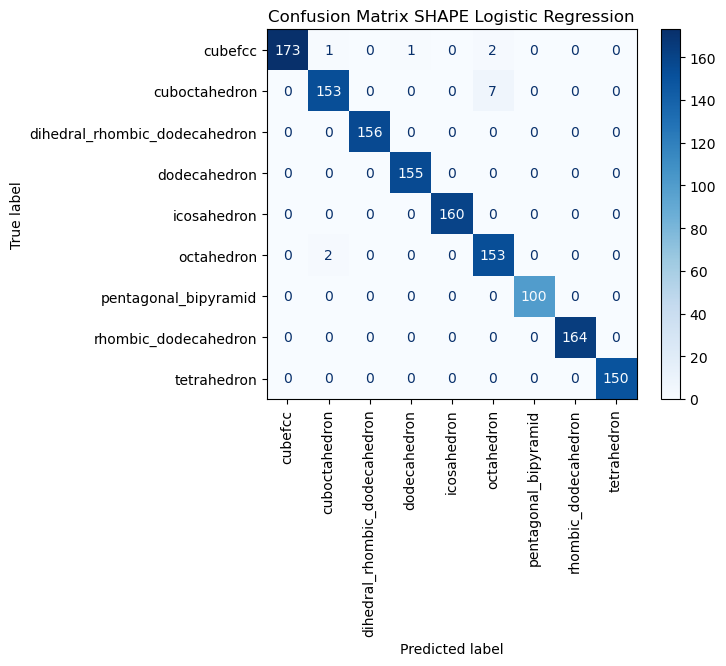

In [55]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test_shape, y_pred_shape)

original_labels = label_encoder.classes_

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=original_labels)
plt.figure(figsize=(4,4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix SHAPE Logistic Regression")
plt.xticks(rotation=90)
plt.show()

# Tests de robustesse des modèles en modifiant les données après l'entraînement (test_set)

## Test d'evaluation des modeles avec ajout de bruit

In [66]:
# Définir les paramètres du bruit
mean = 0  
std_factor = 0.1  

# Calculer le bruit proportionnel à l'intensité
# Utilise la valeur absolue des intensités pour adapter l'écart-type du bruit
noise = np.random.normal(mean, std_factor, X_test.shape)
adapt_noise = np.random.normal(mean, std_factor * np.abs(X_test), X_test.shape)

# Ajouter le bruit aux données
X_test_noisy = X_test + noise
X_test_adapt_noisy = X_test + adapt_noise

In [67]:
# Prédictions
y_pred = ridge_opt.predict(X_test_noisy)

# Calcul de la RMSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.5f} \n")

# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


# Calculer la RMSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]:.3f}")
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
print(f"MSE pour sqrt_eq_radius : {mse_eq_radius:.3f} \n")
print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]:.3f}")
print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]:.3f}")
print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")

Mean Squared Error : 0.36945 

MSE pour log_n_Atoms : 0.013
MSE pour Size_parameters_1 : 1.760
MSE pour sqrt_eq_radius : 0.621 

Q2 pour log_n_Atoms : 0.996
Q2 pour Size_parameters_1 : 0.752
Q2 pour sqrt_log_eq_radius : [0.10691308]


In [68]:
y_pred_noise = logistic_model.predict(X_test_noisy)

accuracy = accuracy_score(y_test_shape, y_pred_noise)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test_shape, y_pred_noise, target_names=label_encoder.classes_))

Accuracy: 0.975

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.97      0.95      0.96       140
                cuboctahedron       0.94      0.89      0.92       128
dihedral_rhombic_dodecahedron       0.98      0.99      0.99       120
                 dodecahedron       0.99      1.00      1.00       129
                  icosahedron       1.00      1.00      1.00       132
                   octahedron       0.90      0.97      0.93       118
         pentagonal_bipyramid       1.00      0.99      0.99        79
         rhombic_dodecahedron       1.00      1.00      1.00       134
                  tetrahedron       1.00      1.00      1.00       122

                     accuracy                           0.98      1102
                    macro avg       0.98      0.98      0.98      1102
                 weighted avg       0.98      0.98      0.98      1102



In [69]:
# Prédictions
y_pred = ridge_opt.predict(X_test_adapt_noisy)

# Calcul de la RMSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.5f} \n")

# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


# Calculer la RMSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]:.3f}")
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
print(f"MSE pour sqrt_eq_radius : {mse_eq_radius:.3f} \n")
print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]:.3f}")
print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]:.3f}")
print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")

Mean Squared Error : 0.35348 

MSE pour log_n_Atoms : 0.012
MSE pour Size_parameters_1 : 1.658
MSE pour sqrt_eq_radius : 0.597 

Q2 pour log_n_Atoms : 0.996
Q2 pour Size_parameters_1 : 0.767
Q2 pour sqrt_log_eq_radius : [0.14140874]


In [70]:
y_pred_adapt_noise = logistic_model.predict(X_test_adapt_noisy)

accuracy = accuracy_score(y_test_shape, y_pred_adapt_noise)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test_shape, y_pred_adapt_noise, target_names=label_encoder.classes_))

Accuracy: 0.984

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.99      0.98      0.99       140
                cuboctahedron       0.95      0.95      0.95       128
dihedral_rhombic_dodecahedron       0.98      1.00      0.99       120
                 dodecahedron       0.99      0.98      0.99       129
                  icosahedron       0.99      0.99      0.99       132
                   octahedron       0.95      0.96      0.95       118
         pentagonal_bipyramid       1.00      1.00      1.00        79
         rhombic_dodecahedron       1.00      1.00      1.00       134
                  tetrahedron       1.00      0.99      1.00       122

                     accuracy                           0.98      1102
                    macro avg       0.98      0.98      0.98      1102
                 weighted avg       0.98      0.98      0.98      1102



## Impact de l'ajout de gruit gaussien

### Impact de l'ajout de gruit gaussien sur la prediction de la forme

In [25]:
def perf_function_adapt_noise(X_test, var):
    """
    Ajoute un bruit gaussien aux données de test et évalue la performance du modèle de classification.
    
    Parameters:
    ----------
    X_test : array-like
        Les données de test originales.
    var : float
        La variance du bruit gaussien ajouté aux données.
    
    Returns:
    -------
    float
        L'accuracy du modèle sur les données bruitées.
    """
    # Ajout d'un bruit gaussien aux données
    adapt_noise = np.random.normal(0, var**0.5, X_test.shape)
    X_test_adapt_noisy = X_test + adapt_noise

    # Prédiction du modèle et évaluation de la performance
    y_pred_adapt_noise = logistic_model.predict(X_test_adapt_noisy)
    accuracy = accuracy_score(y_test_shape, y_pred_adapt_noise)
    print(f"{var} de variance : Test Accuracy = {accuracy:.5f}")
    
    return accuracy

0.01 de variance : Test Accuracy = 0.98330
0.05 de variance : Test Accuracy = 0.90777
0.1 de variance : Test Accuracy = 0.81046
0.2 de variance : Test Accuracy = 0.70443
0.5 de variance : Test Accuracy = 0.56209
1 de variance : Test Accuracy = 0.45897
2 de variance : Test Accuracy = 0.36093
5 de variance : Test Accuracy = 0.27669
10 de variance : Test Accuracy = 0.22222
20 de variance : Test Accuracy = 0.19390
50 de variance : Test Accuracy = 0.16340
100 de variance : Test Accuracy = 0.14161


/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_11932/329555822.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variance', y='Test Accuracy', data=df, palette='Blues_d')


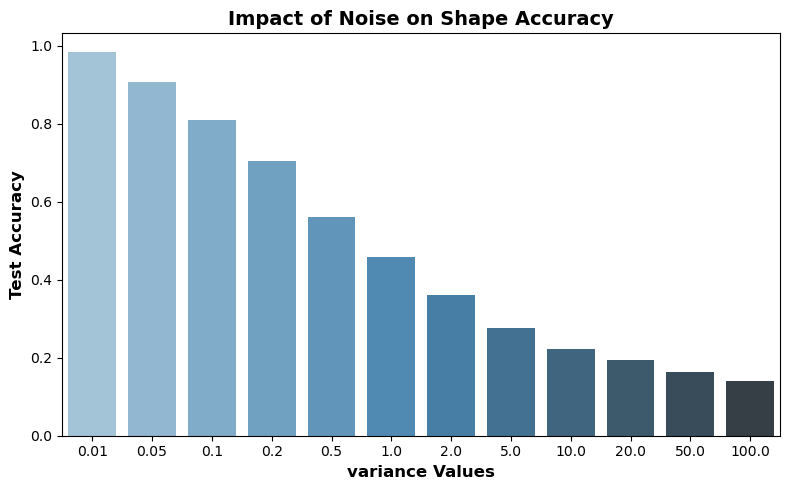

In [26]:
variance = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
test_acc=[]

for var in variance:
    acc=perf_function_adapt_noise(X_test,var)
    test_acc.append(acc)

df = pd.DataFrame({
    'variance': variance,
    'Test Accuracy': test_acc
})

# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='variance', y='Test Accuracy', data=df, palette='Blues_d')

# Ajouter des labels et un titre
plt.xlabel("variance Values", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of Noise on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

### Impact de l'ajout de gruit gaussien sur la prediction de la taille

In [27]:
def perf_function_adapt_noise(X_test, var):
    """
    Évalue l'impact du bruitage des données sur les performances du modèle Ridge.
    
    Paramètres :
    - X_test (array) : Données de test.
    - var (float) : Variance du bruit gaussien ajouté.
    
    Retourne :
    - MSE et Q2 pour chaque paramètre prédit après bruitage des données.
    """
    # Bruitage des données
    adapt_noise = np.random.normal(mean, var**0.5, X_test.shape)
    X_test_adapt_noisy = X_test + adapt_noise

    # Évaluation du modèle sur les données bruitées
    y_pred_adapt_noise = ridge_opt.predict(X_test_adapt_noisy)

    # Calcul de la MSE sur l'échelle standardisée
    mse = mean_squared_error(y_test, y_pred_adapt_noise)
    print(f"MSE on multi-scaled outputs : {mse:.5f} \n")

    # Inversion de la standardisation pour les prédictions et les valeurs réelles
    n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred_adapt_noise[:, 0:2])
    n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:, 0:2])
    n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:, 0:2])

    eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred_adapt_noise[:, 2].reshape(-1, 1))
    eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:, 2].reshape(-1, 1))
    eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:, 2].reshape(-1, 1))

    # Calcul de la MSE et du Q2 sur l'échelle originale
    mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
    mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

    Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
    Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0)).item()
    
    return mse_n_atoms_size_1[0], mse_n_atoms_size_1[1], mse_eq_radius, Q2_n_atoms_size_1[0], Q2_n_atoms_size_1[1], Q2_eq_radius

MSE on multi-scaled outputs : 0.33418 

MSE on multi-scaled outputs : 1.01809 

MSE on multi-scaled outputs : 1.85493 

MSE on multi-scaled outputs : 3.49974 

MSE on multi-scaled outputs : 8.68635 

MSE on multi-scaled outputs : 17.06204 



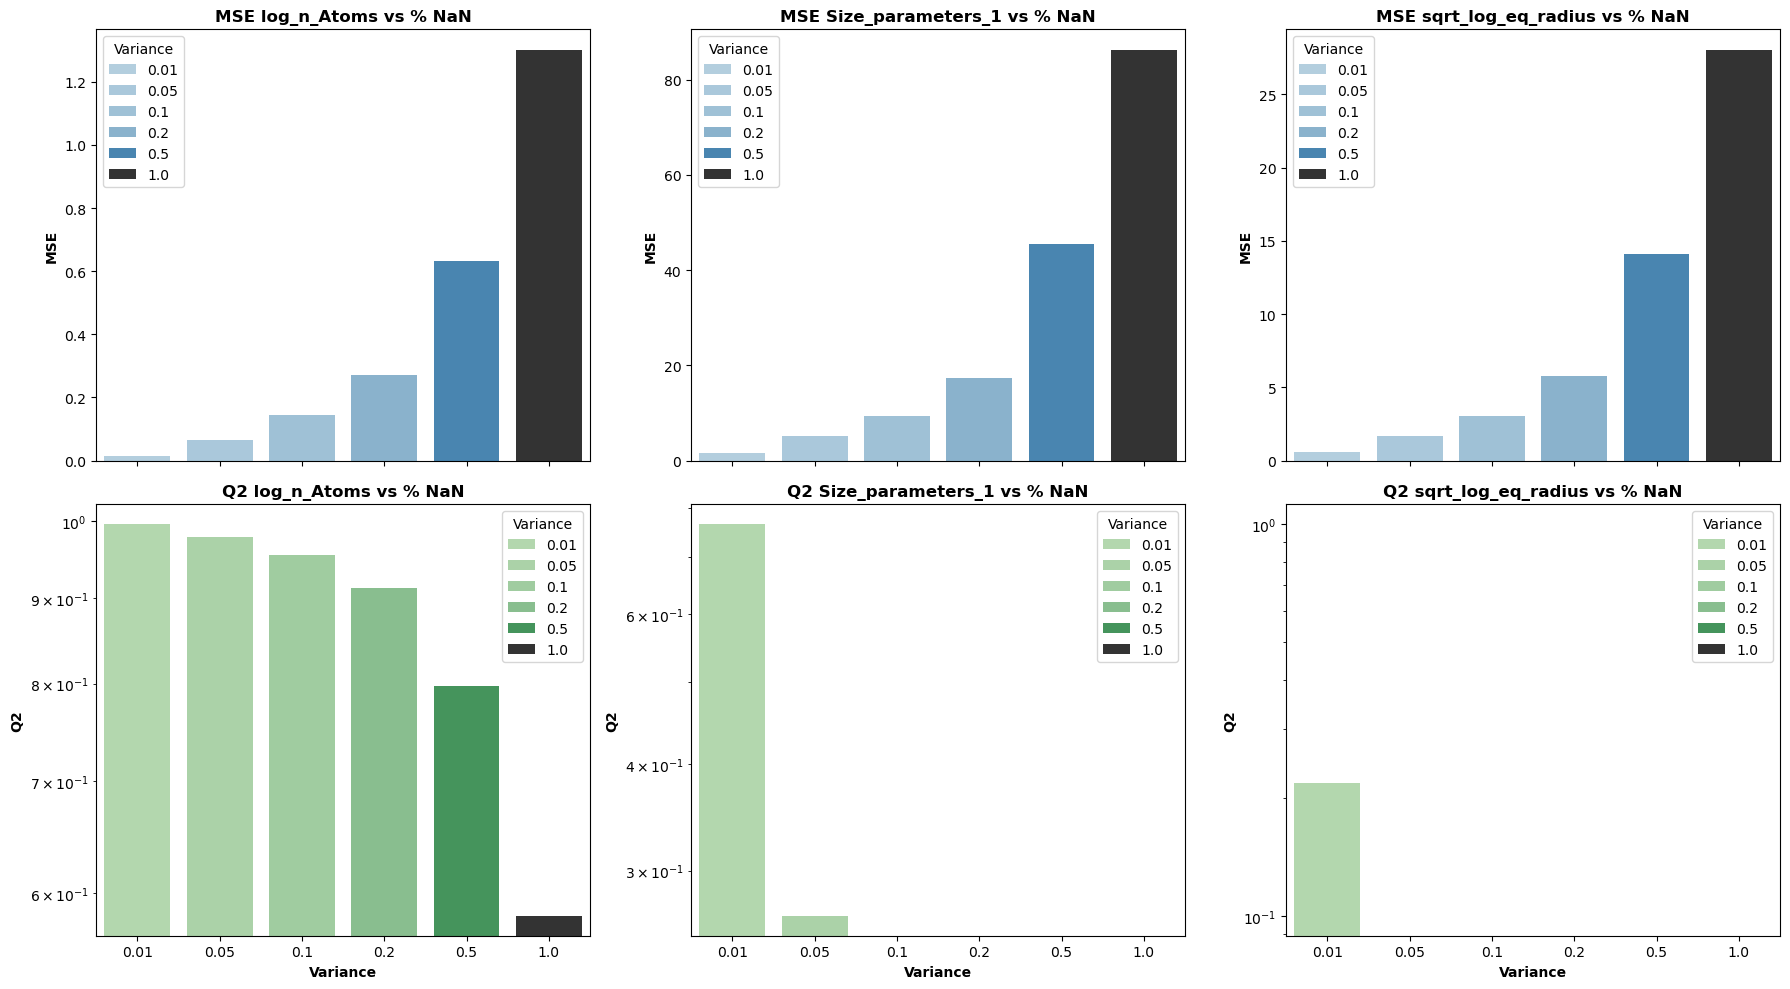

In [28]:
mean = 0
variance = [0.01, 0.05, 0.1, 0.2, 0.5, 1]

n_atoms_mse = []
size_1_mse = []
eq_radius_mse = []
Q2_n_atoms = []
Q2_size_1 = []
Q2_eqradius = []

for var in variance:
    mse_atoms, mse_size, mse_eq_radius, Q2_natoms, Q2_size1, Q2_eq_radius = perf_function_adapt_noise(X_test,var)
    n_atoms_mse.append(mse_atoms)
    size_1_mse.append(mse_size)
    eq_radius_mse.append(mse_eq_radius)
    Q2_n_atoms.append(Q2_natoms)
    Q2_size_1.append(Q2_size1)
    Q2_eqradius.append(Q2_eq_radius)

df = pd.DataFrame({
    'Variance': variance,
    'MSE log_n_Atoms': n_atoms_mse,
    'MSE Size_parameters_1': size_1_mse,
    'MSE sqrt_log_eq_radius': eq_radius_mse,
    'Q2 log_n_Atoms': Q2_n_atoms,
    'Q2 Size_parameters_1': Q2_size_1,
    'Q2 sqrt_log_eq_radius': Q2_eqradius
})

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Variance', y=col, hue='Variance', data=df, palette='Blues_d', ax=ax)
    #ax.set_yscale('log')
    ax.set_title(f"{col} vs % NaN", fontsize=12, fontweight='bold')
    ax.set_xlabel("Variance", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Variance', y=col, hue='Variance', data=df, palette='Greens_d', ax=ax)
    ax.set_yscale('log')
    ax.set_title(f"{col} vs % NaN", fontsize=12, fontweight='bold')
    ax.set_xlabel("Variance", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


MSE on multi-scaled outputs : 0.34050 

MSE on multi-scaled outputs : 1.04130 

MSE on multi-scaled outputs : 1.80859 

MSE on multi-scaled outputs : 3.67348 

MSE on multi-scaled outputs : 9.15733 

MSE on multi-scaled outputs : 16.64157 

MSE on multi-scaled outputs : 34.51926 

MSE on multi-scaled outputs : 83.92273 

MSE on multi-scaled outputs : 169.59221 

MSE on multi-scaled outputs : 321.84595 

MSE on multi-scaled outputs : 847.04772 

MSE on multi-scaled outputs : 1713.96252 



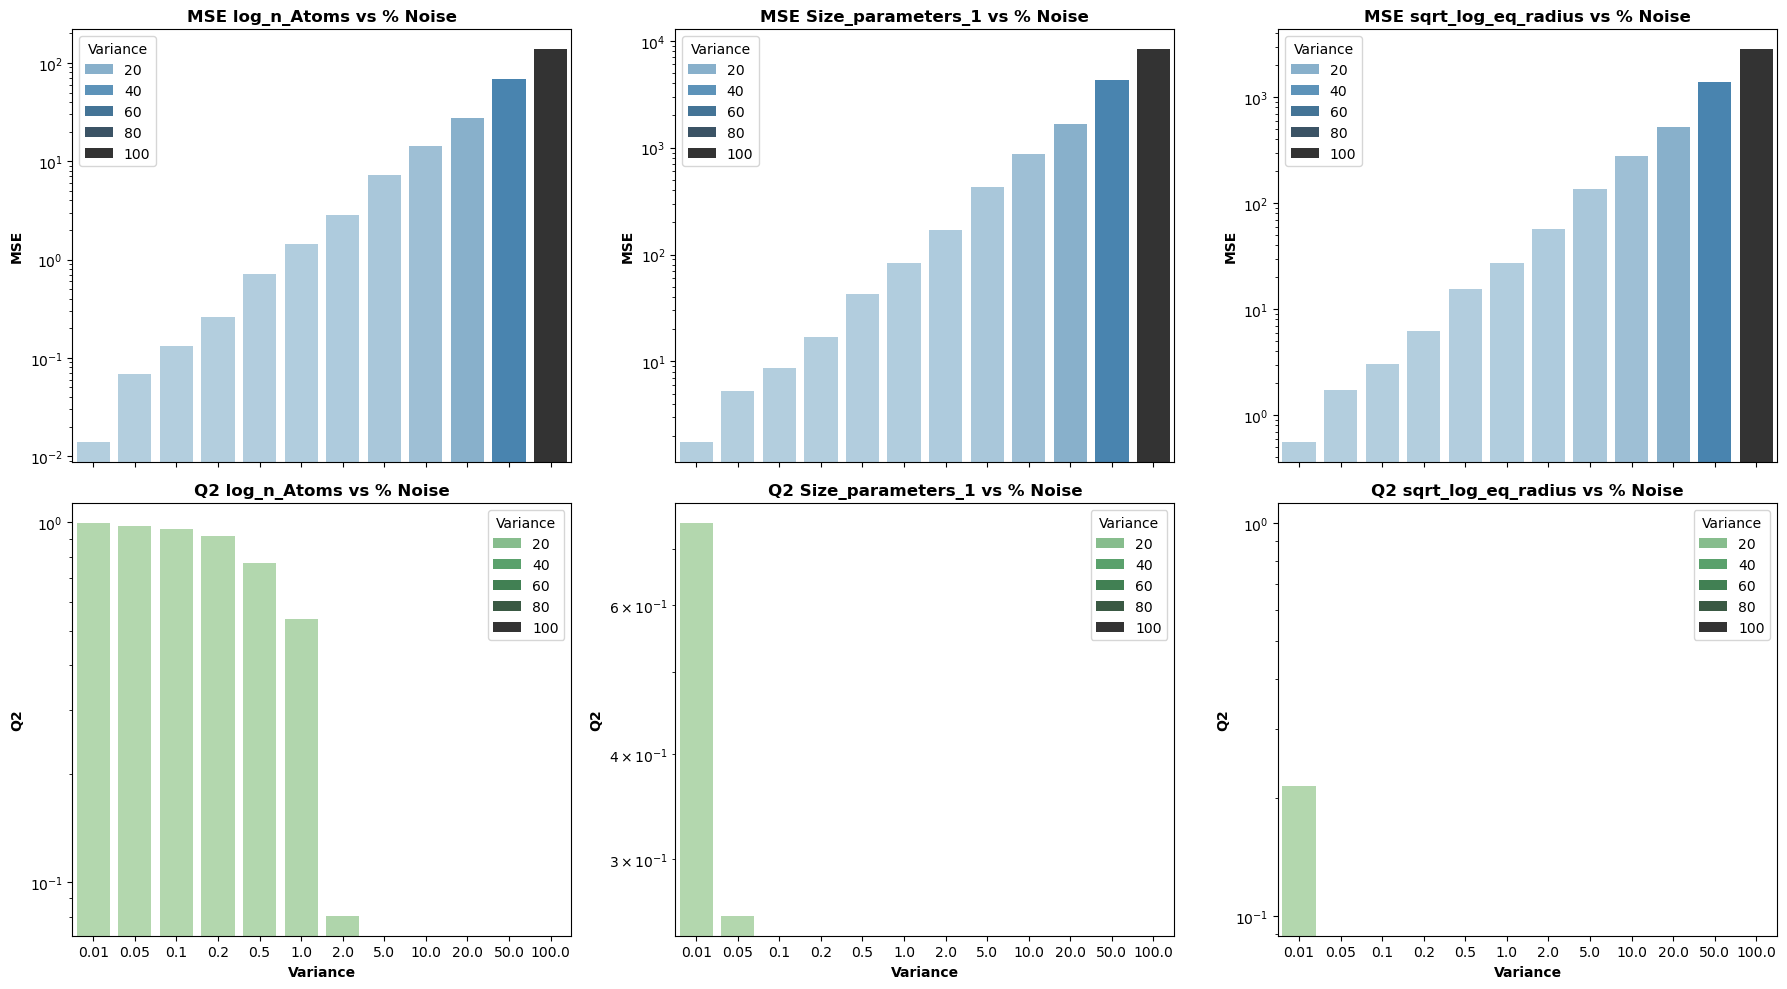

In [33]:
variance = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]

n_atoms_mse = []
size_1_mse = []
eq_radius_mse = []
Q2_n_atoms = []
Q2_size_1 = []
Q2_eqradius = []

for var in variance:
    mse_atoms, mse_size, mse_eq_radius, Q2_natoms, Q2_size1, Q2_eq_radius = perf_function_adapt_noise(X_test,var)
    n_atoms_mse.append(mse_atoms)
    size_1_mse.append(mse_size)
    eq_radius_mse.append(mse_eq_radius)
    Q2_n_atoms.append(Q2_natoms)
    Q2_size_1.append(Q2_size1)
    Q2_eqradius.append(Q2_eq_radius)

df = pd.DataFrame({
    'Variance': variance,
    'MSE log_n_Atoms': n_atoms_mse,
    'MSE Size_parameters_1': size_1_mse,
    'MSE sqrt_log_eq_radius': eq_radius_mse,
    'Q2 log_n_Atoms': Q2_n_atoms,
    'Q2 Size_parameters_1': Q2_size_1,
    'Q2 sqrt_log_eq_radius': Q2_eqradius
})

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Variance', y=col, hue='Variance', data=df, palette='Blues_d', ax=ax)
    ax.set_yscale('log')
    ax.set_title(f"{col} vs % Noise", fontsize=12, fontweight='bold')
    ax.set_xlabel("Variance", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Variance', y=col, hue='Variance', data=df, palette='Greens_d', ax=ax)
    ax.set_yscale('log')
    ax.set_title(f"{col} vs % Noise", fontsize=12, fontweight='bold')
    ax.set_xlabel("Variance", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [31]:
# Dataframe des résultats
df

,Variance,MSE log_n_Atoms,MSE Size_parameters_1,MSE sqrt_log_eq_radius,Q2 log_n_Atoms,Q2 Size_parameters_1,Q2 sqrt_log_eq_radius
0,0.01,0.013114,1.667653,0.590309,0.995783,0.764157,0.168917
1,0.05,0.066060,5.221565,1.695153,0.978755,0.261555,-1.386569
2,0.10,0.133728,8.826548,3.043203,0.956993,-0.248270,-3.284459
3,0.20,0.277722,18.045823,6.138229,0.910685,-1.552079,-7.641878
4,0.50,0.658307,43.694336,14.240971,0.788290,-5.179348,-19.049553
5,1.00,1.343940,85.395617,28.201303,0.567792,-11.076833,-38.703999
6,2.00,2.625190,160.644014,50.726722,0.155746,-21.718624,-70.417045
7,5.00,7.274642,398.290786,141.851203,-1.339505,-55.327145,-198.709213
8,10.00,13.750965,852.257203,268.128797,-3.422272,-119.528059,-376.492681
9,20.00,26.303945,1616.570948,562.084777,-7.459275,-227.618964,-790.346890


## Impact de l'ajout de trous dans la courbe suivie d'une interpolation par Spline Cubique pour les remplir

In [56]:
def introduce_nans(X, perc=10, random_state=42):
    """
    Introduit des valeurs NaN de manière aléatoire dans un pourcentage des colonnes des échantillons.
    
    Parameters:
    ----------
    X : array-like
        Les données à modifier.
    perc : int, optional (default=10)
        Pourcentage de colonnes à affecter par ligne.
    random_state : int, optional (default=42)
        Graine pour la reproductibilité.
    
    Returns:
    -------
    array-like
        Une version de X contenant des valeurs NaN.
    """
    Xc = np.array(X) if not isinstance(X, np.ndarray) else X.copy()
    np.random.seed(random_state)
    
    num_nans = int(perc * Xc.shape[1] / 100)
    n_samples, n_features = Xc.shape
    
    for i in range(n_samples):
        nan_columns = np.random.choice(n_features, num_nans, replace=False)
        Xc[i, nan_columns] = np.nan
    
    return Xc

In [57]:
from scipy.interpolate import CubicSpline

q=data.loc[1,"q"]

def interpolate_with_q_spline(X_nan, q):
    """
    Interpole les valeurs NaN dans X_nan en utilisant une spline cubique basée sur q.
    
    Parameters:
    ----------
    X_nan : array-like
        Données contenant des valeurs NaN.
    q : array-like
        Points d'échantillonnage servant de repère pour l'interpolation.
    
    Returns:
    -------
    array-like
        Données avec les valeurs NaN interpolées.
    """
    X_interp = X_nan.copy()
    n_samples, n_features = X_nan.shape
    
    for i in range(n_samples):
        row = X_interp[i, :]
        nan_indices = np.isnan(row)
        non_nan_indices = ~nan_indices
        
        if np.sum(non_nan_indices) > 1:
            q_non_nan = q[non_nan_indices]
            values_non_nan = row[non_nan_indices]
            spline = CubicSpline(q_non_nan, values_non_nan)
            row[nan_indices] = spline(q[nan_indices])
    
    return X_interp


In [58]:
X = intensities_df

X_nan = introduce_nans(X, perc=10)

X_interp = interpolate_with_q_spline(X_nan, q)

Text(0.5, 1.0, 'Interpolated Data')

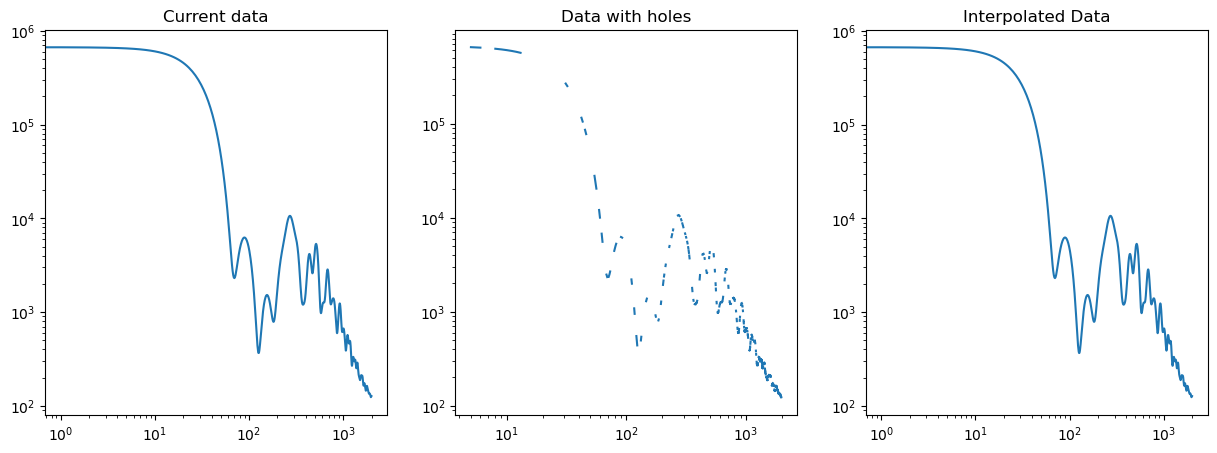

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.loglog(X.iloc[5,:])
plt.title("Current data")

X_nan=introduce_nans(X,perc=60)

plt.subplot(132)
plt.loglog(X_nan[5,:])
plt.title("Data with holes")

X_interp=interpolate_with_q_spline(X_nan,q)

plt.subplot(133)
plt.loglog(X_interp[5,:])
plt.title("Interpolated Data")

In [60]:
mse = mean_squared_error(X.to_numpy(), X_interp)
mse

3.4928555e+16

In [61]:
print(f"norme X : {np.linalg.norm(X.to_numpy())}\n")
print(f"norme de X_interp : {np.linalg.norm(X_interp)}\n")
print(f"diff des normes : {np.linalg.norm(X.to_numpy())-np.linalg.norm(X_interp)}")

norme X : 7340384321536.0

norme de X_interp : 7489021018112.0

diff des normes : -148636696576.0


In [62]:
def eval_reconstruction(X, perc):
    """
    Évalue la reconstruction des données après interpolation en calculant la MSE et la différence de norme.
    
    Parameters:
    ----------
    X : array-like
        Les données originales.
    perc : list of int
        Liste des pourcentages de valeurs NaN introduites.
    
    Returns:
    -------
    tuple of lists
        Liste des MSE et des différences de norme pour chaque pourcentage de NaN.
    """
    mse, diff_norm = [], []
    for p in perc:
        X_nan = introduce_nans(X, p)
        X_interp = interpolate_with_q_spline(X_nan, q)
        mse.append(mean_squared_error(X.to_numpy(), X_interp))
        diff_norm.append(abs(np.linalg.norm(X.to_numpy()) - np.linalg.norm(X_interp)))
    
    return mse, diff_norm

In [63]:
perc = [10, 20, 30, 40, 50, 60, 70, 80, 90, 95]

mse, diff_norm = eval_reconstruction(X,perc)

Text(0, 0.5, 'diff_norm')

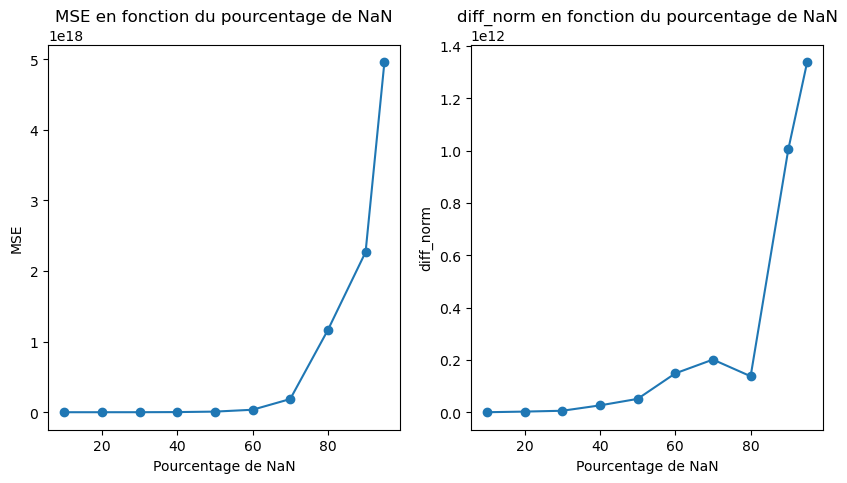

In [64]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(perc, mse, marker='o')
plt.title("MSE en fonction du pourcentage de NaN")
plt.xlabel("Pourcentage de NaN")
plt.ylabel("MSE")

plt.subplot(122)
plt.plot(perc, diff_norm, marker='o')
plt.title("diff_norm en fonction du pourcentage de NaN")
plt.xlabel("Pourcentage de NaN")
plt.ylabel("diff_norm")

### Impact de l'ajout trous + interpolation sur la prediction de la forme

In [65]:
def perf_shape_interpo(X_test, perc):
    """
    Évalue l'impact de l'interpolation sur la classification de la forme.
    
    Paramètres :
    - X_test (array) : Données de test.
    - perc (float) : Pourcentage de valeurs remplacées par des NaN.
    
    Retourne :
    - Accuracy après interpolation.
    """
    # Transformation des données avec interpolation
    X_nan = introduce_nans(X_test, perc=perc)
    X_interp = interpolate_with_q_spline(X_nan, q)

    # Prédiction et évaluation
    y_pred_interp = logistic_model.predict(X_interp)
    accuracy = accuracy_score(y_test_shape, y_pred_interp)
    print(f"{perc} % de NaN : Test Accuracy = {accuracy:.5f}")
    
    return accuracy

10 % de NaN : Test Accuracy = 0.99056
20 % de NaN : Test Accuracy = 0.99056
30 % de NaN : Test Accuracy = 0.98983
40 % de NaN : Test Accuracy = 0.98911
50 % de NaN : Test Accuracy = 0.98620
60 % de NaN : Test Accuracy = 0.97023
70 % de NaN : Test Accuracy = 0.91794
80 % de NaN : Test Accuracy = 0.80392
90 % de NaN : Test Accuracy = 0.51416
95 % de NaN : Test Accuracy = 0.30501


/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_11932/3168982152.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Test Accuracy', data=df, palette='Blues_d')


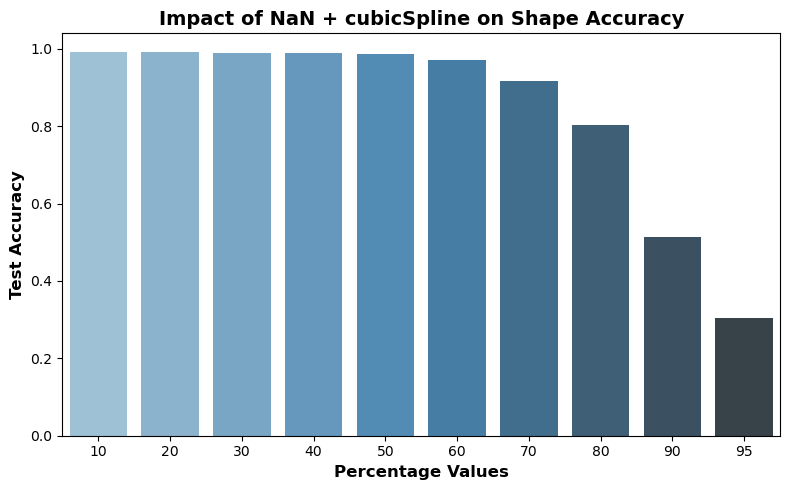

In [66]:
perc = [10, 20, 30, 40, 50, 60, 70, 80, 90, 95]
test_acc=[]

for per in perc:
    acc=perf_shape_interpo(X_test,per)
    test_acc.append(acc)

df = pd.DataFrame({
    'Percentage': perc,
    'Test Accuracy': test_acc
})

# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='Test Accuracy', data=df, palette='Blues_d')

# Ajouter des labels et un titre
plt.xlabel("Percentage Values", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of NaN + cubicSpline on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

### Impact de l'ajout trous + interpolation sur la prediction de la taille

In [67]:
def perf_size_interpo(X_test, perc):
    """
    Évalue l'impact de l'interpolation sur la régression des tailles.
    
    Paramètres :
    - X_test (array) : Données de test.
    - perc (float) : Pourcentage de valeurs remplacées par des NaN.
    
    Retourne :
    - MSE et Q2 après interpolation.
    """
    # Transformation des données avec interpolation
    X_nan = introduce_nans(X_test, perc=perc)
    X_interp = interpolate_with_q_spline(X_nan, q)

    # Prédiction et évaluation
    y_pred_interp = ridge_opt.predict(X_interp)
    mse = mean_squared_error(y_test, y_pred_interp)
    print(f"MSE on multi-scaled outputs : {mse:.5f} \n")

    # Inversion de la standardisation
    n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred_interp[:, 0:2])
    n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:, 0:2])
    n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:, 0:2])

    eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred_interp[:, 2].reshape(-1, 1))
    eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:, 2].reshape(-1, 1))
    eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:, 2].reshape(-1, 1))

    # Calcul de la MSE et du Q2 sur l'échelle originale
    mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
    mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

    Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
    Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0)).item()
    
    return mse_n_atoms_size_1[0], mse_n_atoms_size_1[1], mse_eq_radius, Q2_n_atoms_size_1[0], Q2_n_atoms_size_1[1], Q2_eq_radius


MSE on multi-scaled outputs : 0.18200 

MSE on multi-scaled outputs : 0.18288 

MSE on multi-scaled outputs : 0.18375 

MSE on multi-scaled outputs : 0.18473 

MSE on multi-scaled outputs : 0.27516 

MSE on multi-scaled outputs : 27.60990 

MSE on multi-scaled outputs : 160.58630 

MSE on multi-scaled outputs : 361.50983 

MSE on multi-scaled outputs : 10193.86124 

MSE on multi-scaled outputs : 139916.19533 



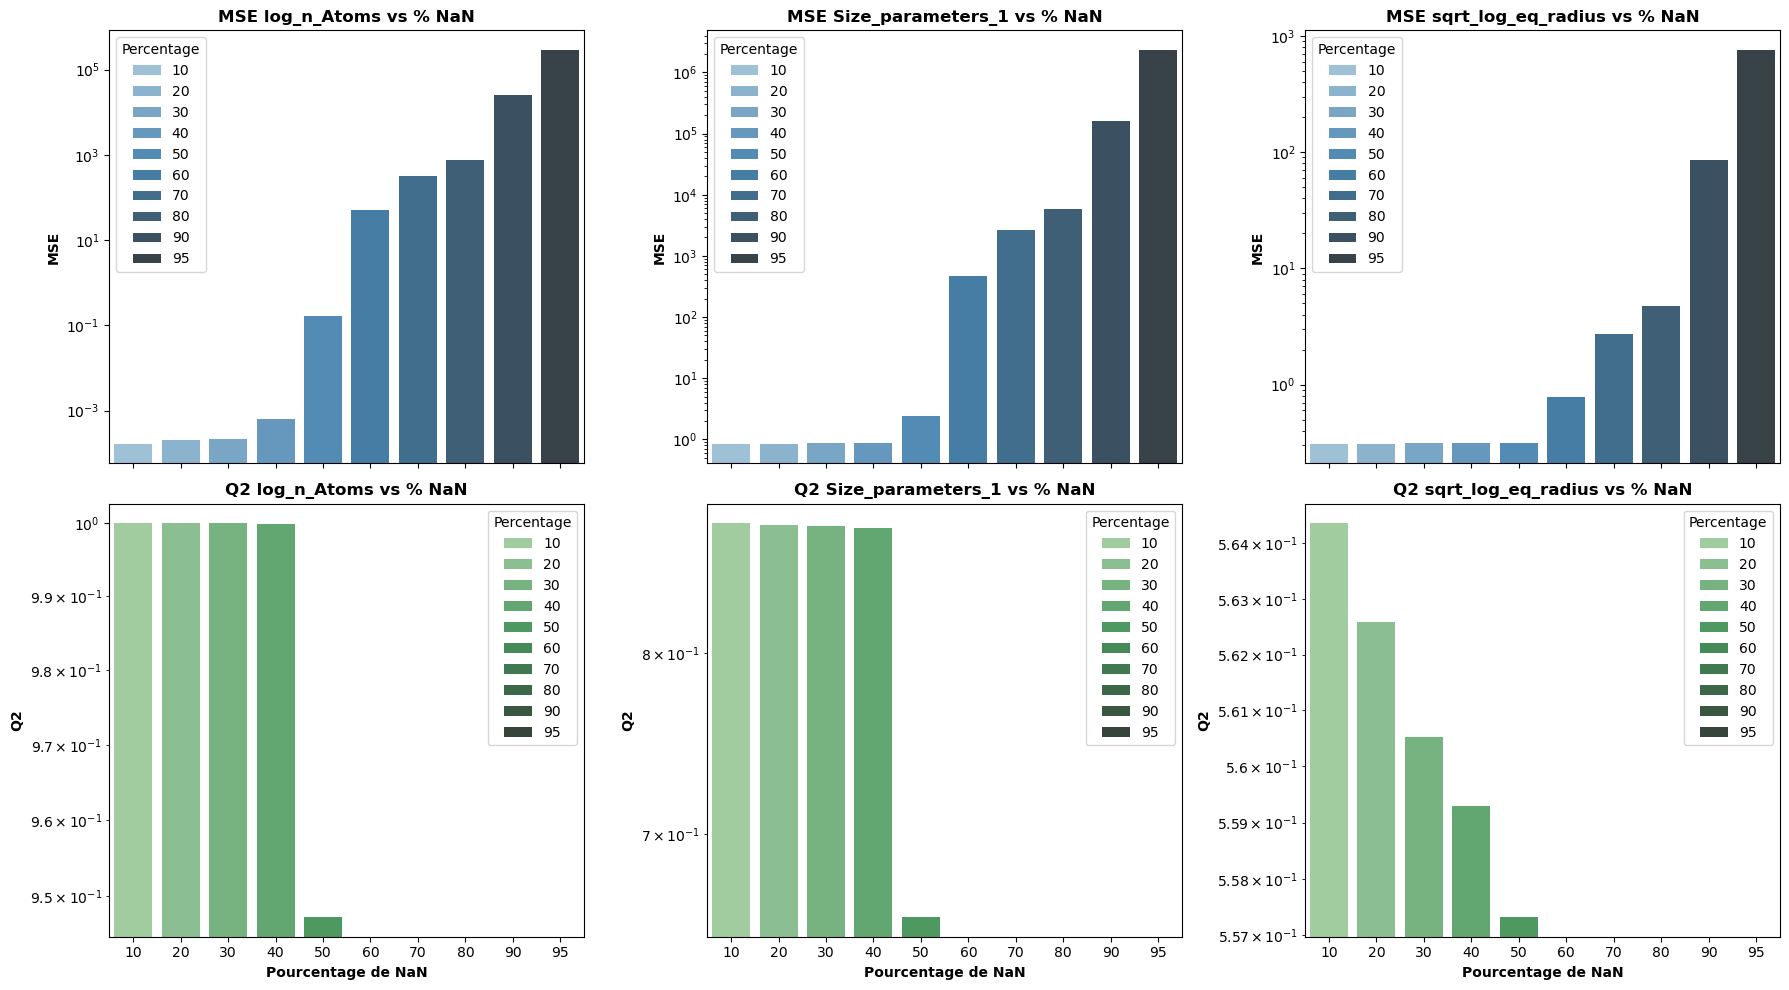

In [68]:
n_atoms_mse = []
size_1_mse = []
eq_radius_mse = []
Q2_n_atoms = []
Q2_size_1 = []
Q2_eqradius = []

for per in perc:
    mse_atoms, mse_size, mse_eq_radius, Q2_natoms, Q2_size1, Q2_eq_radius = perf_size_interpo(X_test,per)
    n_atoms_mse.append(mse_atoms)
    size_1_mse.append(mse_size)
    eq_radius_mse.append(mse_eq_radius)
    Q2_n_atoms.append(Q2_natoms)
    Q2_size_1.append(Q2_size1)
    Q2_eqradius.append(Q2_eq_radius)

df = pd.DataFrame({
    'Percentage': perc,
    'MSE log_n_Atoms': n_atoms_mse,
    'MSE Size_parameters_1': size_1_mse,
    'MSE sqrt_log_eq_radius': eq_radius_mse,
    'Q2 log_n_Atoms': Q2_n_atoms,
    'Q2 Size_parameters_1': Q2_size_1,
    'Q2 sqrt_log_eq_radius': Q2_eqradius
})

df['Percentage'] = pd.Categorical(df['Percentage'], categories=perc, ordered=True)

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Percentage', y=col, hue='Percentage', data=df, palette='Blues_d', ax=ax)
    ax.set_yscale('log')
    ax.set_title(f"{col} vs % NaN", fontsize=12, fontweight='bold')
    ax.set_xlabel("Pourcentage de NaN", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Percentage', y=col, hue='Percentage', data=df, palette='Greens_d', ax=ax)
    ax.set_yscale('log')
    ax.set_title(f"{col} vs % NaN", fontsize=12, fontweight='bold')
    ax.set_xlabel("Pourcentage de NaN", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


In [69]:
df

,Percentage,MSE log_n_Atoms,MSE Size_parameters_1,MSE sqrt_log_eq_radius,Q2 log_n_Atoms,Q2 Size_parameters_1,Q2 sqrt_log_eq_radius
0,10,0.000166,8.491591e-01,0.309435,0.999946,0.879910,0.564354
1,20,0.000209,8.554473e-01,0.310690,0.999933,0.879021,0.562586
2,30,0.000212,8.597194e-01,0.312147,0.999932,0.878417,0.560535
3,40,0.000645,8.709482e-01,0.313024,0.999793,0.876829,0.559301
4,50,0.163824,2.414012e+00,0.314429,0.947315,0.658605,0.557322
5,60,51.239524,4.646128e+02,0.774377,-15.478488,-64.706544,-0.090228
6,70,311.937510,2.688788e+03,2.737565,-99.318233,-379.254197,-2.854159
7,80,752.612915,5.955966e+03,4.710036,-241.038214,-841.305575,-5.631156
8,90,24920.649218,1.602481e+05,85.632509,-8013.411273,-22661.637869,-119.560140
9,95,287903.334526,2.322976e+06,757.015039,-92587.909285,-328519.272389,-1064.784950


## Impact de mettre les extrémités des courbes à 0

### Impact des extrémités nulles sur la prédiction de la forme

In [34]:
def perf_function_conserve_block(X_test, conserve_percentage):
    """
    Conserve un bloc continu de la courbe correspondant à un pourcentage donné, 
    place ce bloc à une position aléatoire et met les extrémités en dehors de ce bloc à 0.
    
    Arguments:
        X_test (ndarray): Les données de test.
        conserve_percentage (float): Le pourcentage de la courbe à conserver (0-100%).
    
    Retourne:
        accuracy (float): La précision du modèle après transformation.
    """
    X_test_block = np.zeros_like(X_test)  # Initialiser un tableau rempli de zéros
    n_features = X_test.shape[1]
    block_length = int(conserve_percentage / 100 * n_features)  # Taille du bloc à conserver

    for i in range(X_test.shape[0]):  # Parcours des courbes
        # Déterminer une position aléatoire pour le début du bloc
        start_idx = np.random.randint(0, n_features - block_length + 1)
        # Copier les valeurs du bloc sélectionné
        X_test_block[i, start_idx:start_idx + block_length] = X_test[i, start_idx:start_idx + block_length]

    # Évaluation du modèle sur les données transformées
    y_pred_block = logistic_model.predict(X_test_block)
    accuracy = accuracy_score(y_test_shape, y_pred_block)
    print(f"{conserve_percentage}% conserve : Test Accuracy = {accuracy:.5f}")

    return accuracy

90% conserve : Test Accuracy = 0.37114
80% conserve : Test Accuracy = 0.29038
70% conserve : Test Accuracy = 0.24138
60% conserve : Test Accuracy = 0.21053
50% conserve : Test Accuracy = 0.20780
40% conserve : Test Accuracy = 0.18240
30% conserve : Test Accuracy = 0.14973
20% conserve : Test Accuracy = 0.13975
10% conserve : Test Accuracy = 0.14519


/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/1052518639.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conserve Percentage', y='Test Accuracy', data=df_block, palette='Greens_d')


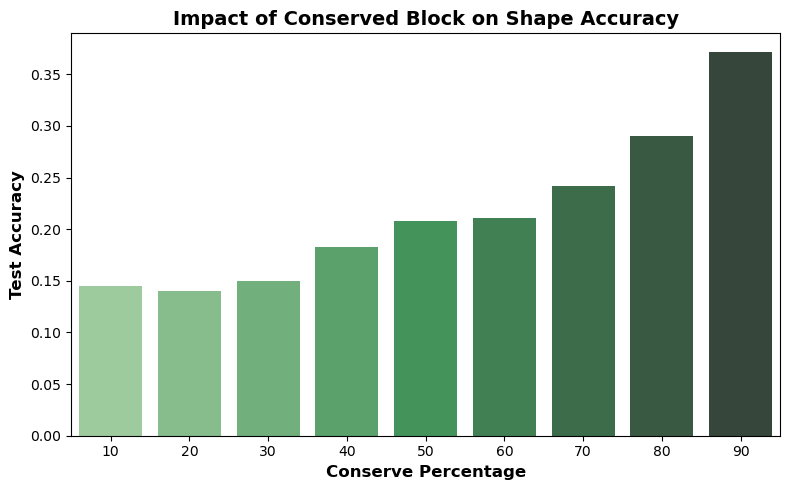

In [35]:
# Niveaux de conservation à tester
conserve_percentages = [90, 80, 70, 60, 50, 40, 30, 20, 10]
test_acc_block = []

for conserve_percentage in conserve_percentages:
    acc = perf_function_conserve_block(X_test, conserve_percentage)
    test_acc_block.append(acc)

# Stocker les résultats dans un DataFrame
df_block = pd.DataFrame({
    'Conserve Percentage': conserve_percentages,
    'Test Accuracy': test_acc_block
})

# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Conserve Percentage', y='Test Accuracy', data=df_block, palette='Greens_d')

# Ajouter des labels et un titre
plt.xlabel("Conserve Percentage", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of Conserved Block on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

### Impact des extrémités nulles sur la prédiction de la taille

In [40]:
def perf_function_conserve_block(X_test, conserve_percentage):
    """
    Conserve un bloc continu de la courbe correspondant à un pourcentage donné, 
    place ce bloc à une position aléatoire et met les extrémités en dehors de ce bloc à 0.
    
    Arguments:
        X_test (ndarray): Les données de test.
        conserve_percentage (float): Le pourcentage de la courbe à conserver (0-100%).
    
    Retourne:
        accuracy (float): La précision du modèle après transformation.
    """
    X_test_block = np.zeros_like(X_test)  # Initialiser un tableau rempli de zéros
    n_features = X_test.shape[1]
    block_length = int(conserve_percentage / 100 * n_features)  # Taille du bloc à conserver

    for i in range(X_test.shape[0]):  # Parcours des courbes
        # Déterminer une position aléatoire pour le début du bloc
        start_idx = np.random.randint(0, n_features - block_length + 1)
        # Copier les valeurs du bloc sélectionné
        X_test_block[i, start_idx:start_idx + block_length] = X_test[i, start_idx:start_idx + block_length]

    # Évaluation du modèle sur les données transformées
    y_pred_block = ridge_opt.predict(X_test_block)

    # Calcul de la RMSE sur l'échelle standardisée
    mse = mean_squared_error(y_test, y_pred_block)
    print(f"% conservé : {conserve_percentage}, MSE on multi-scaled outputs : {mse:.5f} \n")

    # Inversion de la standardisation pour les prédictions et les valeurs réelles
    n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred_block[:,0:2])
    n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
    n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

    eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred_block[:,2].reshape(-1,1))
    eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
    eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


    # Calculer la RMSE pour chaque paramètre sur l'échelle originale
    mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
    mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

    Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
    Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))
    Q2_eq_radius = Q2_eq_radius.item()
    
    #print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]:.3f}")
    #print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
    #print(f"MSE pour sqrt_eq_radius : {mse_eq_radius:.3f} \n")
    #print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]:.3f}")
    #print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]:.3f}")
    #print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")

    return mse_n_atoms_size_1[0], mse_n_atoms_size_1[1], mse_eq_radius, Q2_n_atoms_size_1[0], Q2_n_atoms_size_1[1], Q2_eq_radius

% conservé : 90, MSE on multi-scaled outputs : 9.63021 

% conservé : 80, MSE on multi-scaled outputs : 18.34632 

% conservé : 70, MSE on multi-scaled outputs : 32.25981 

% conservé : 60, MSE on multi-scaled outputs : 29.85142 

% conservé : 50, MSE on multi-scaled outputs : 16.02169 

% conservé : 40, MSE on multi-scaled outputs : 12.89473 

% conservé : 30, MSE on multi-scaled outputs : 23.90118 

% conservé : 20, MSE on multi-scaled outputs : 32.28292 

% conservé : 10, MSE on multi-scaled outputs : 23.84803 



/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/3100080266.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% conservé', y=col, data=df, palette='Blues_d', ax=ax)
/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/3100080266.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% conservé', y=col, data=df, palette='Blues_d', ax=ax)
/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/3100080266.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% conservé', y=col, data=df, palette='Blu

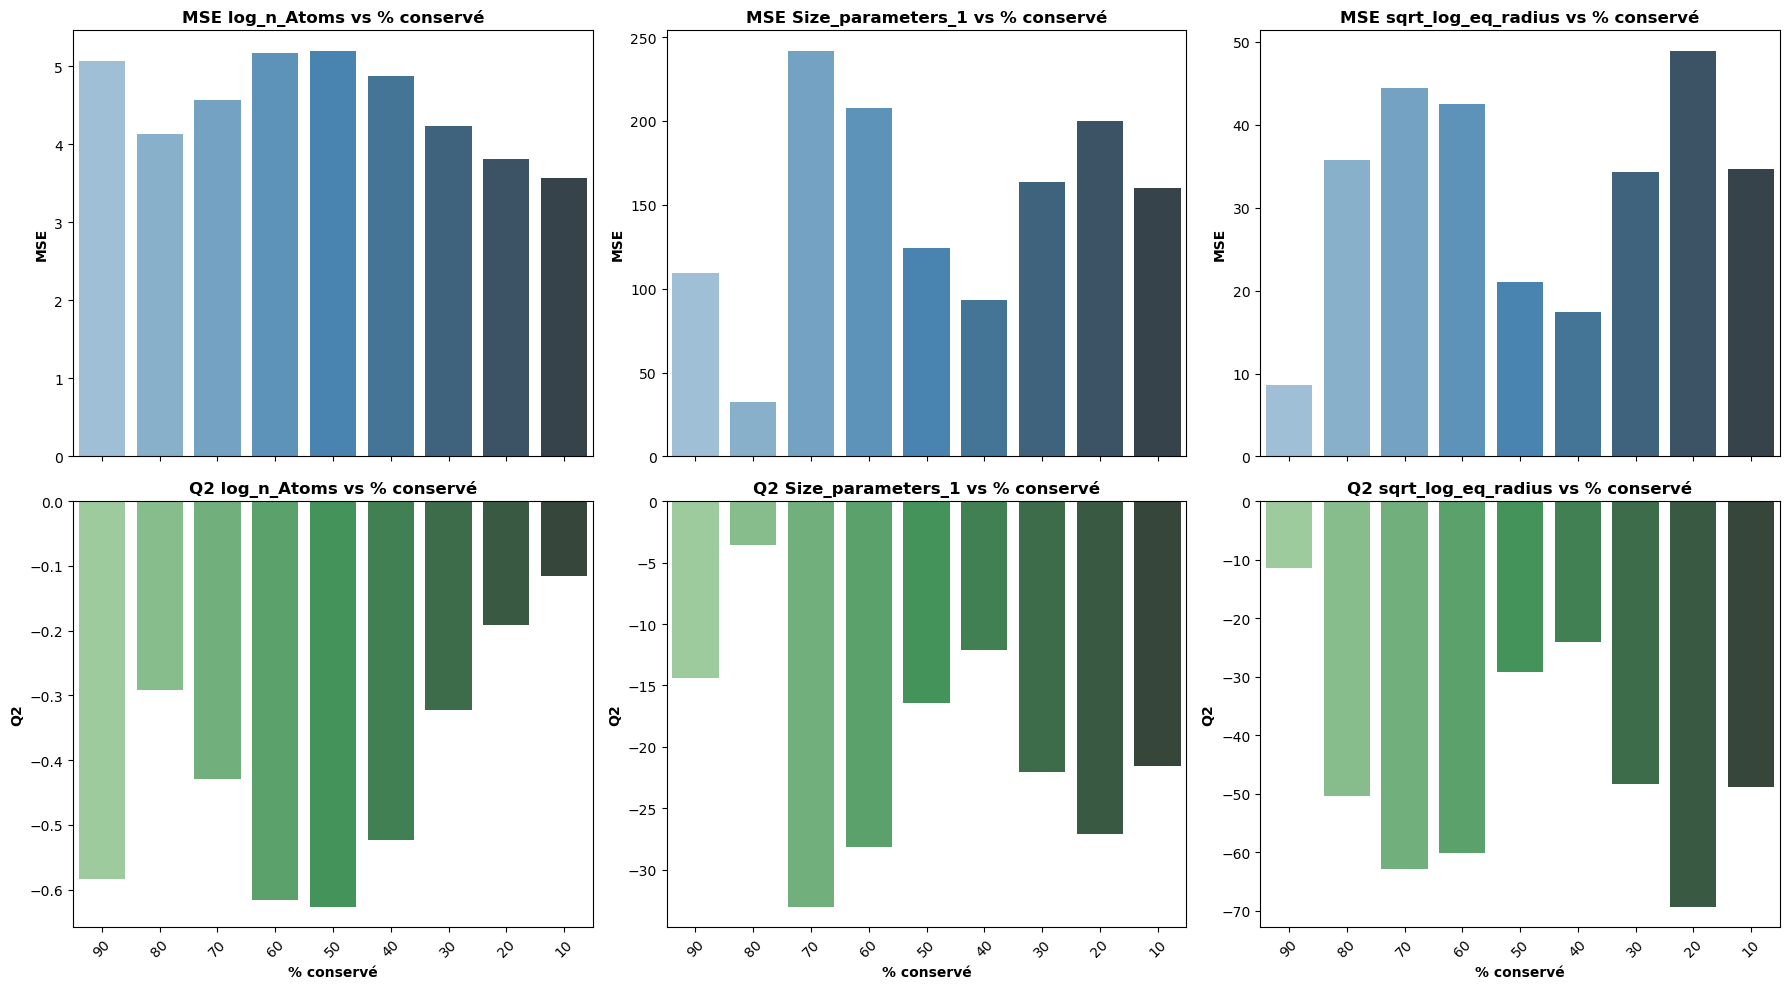

In [41]:
# Niveaux de conservation à tester
conserve_percentages = [90, 80, 70, 60, 50, 40, 30, 20, 10]

n_atoms_mse = []
size_1_mse = []
eq_radius_mse = []
Q2_n_atoms = []
Q2_size_1 = []
Q2_eqradius = []

for conserve_percentage in conserve_percentages:
    mse_atoms, mse_size, mse_eq_radius, Q2_natoms, Q2_size1, Q2_eq_radius = perf_function_conserve_block(X_test, conserve_percentage)
    n_atoms_mse.append(mse_atoms)
    size_1_mse.append(mse_size)
    eq_radius_mse.append(mse_eq_radius)
    Q2_n_atoms.append(Q2_natoms)
    Q2_size_1.append(Q2_size1)
    Q2_eqradius.append(Q2_eq_radius)

df = pd.DataFrame({
    '% conservé': conserve_percentages,
    'MSE log_n_Atoms': n_atoms_mse,
    'MSE Size_parameters_1': size_1_mse,
    'MSE sqrt_log_eq_radius': eq_radius_mse,
    'Q2 log_n_Atoms': Q2_n_atoms,
    'Q2 Size_parameters_1': Q2_size_1,
    'Q2 sqrt_log_eq_radius': Q2_eqradius
})

# Trier les pourcentages dans l'ordre décroissant
df['% conservé'] = pd.Categorical(df['% conservé'], categories=sorted(conserve_percentages, reverse=True), ordered=True)

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='% conservé', y=col, data=df, palette='Blues_d', ax=ax)
    ax.set_title(f"{col} vs % conservé", fontsize=12, fontweight='bold')
    ax.set_xlabel("% conservé", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='% conservé', y=col, data=df, palette='Greens_d', ax=ax)
    ax.set_title(f"{col} vs % conservé", fontsize=12, fontweight='bold')
    ax.set_xlabel("% conservé", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

# Tests de robustesse des modèles en modifiant les données avant l'entraînement

## Modèles entraînés sur des courbes avec différents q_step (on modifie le nombre de points dans la courbe)

In [81]:
def create_smaller_df(df, alpha):
    """
    Réduit la taille d'un DataFrame en sélectionnant un sous-ensemble de colonnes de manière déterministe.
    
    Paramètres :
    - df (DataFrame) : Jeu de données original.
    - alpha (float) : Pourcentage de colonnes à conserver.
    
    Retourne :
    - DataFrame contenant seulement les colonnes sélectionnées.
    """
    nb_q = df.shape[1]

    # Calcul du nombre de colonnes à sélectionner
    nb_selected_q = max(1, int((alpha / 100) * nb_q))

    # Sélection des colonnes de manière déterministe
    step = nb_q // nb_selected_q
    selected_features = df.columns[::step][:nb_selected_q]
    
    # Création du sous-DataFrame avec les colonnes sélectionnées
    df_child = df[selected_features]
    return df_child

### Ridge models

In [82]:
def models_with_less_data(df_log_intensities, data_num, perc):
    """
    Entraîne un modèle de régression Ridge pour prédire plusieurs paramètres à partir de données réduites.
    
    Paramètres :
    - df_log_intensities (DataFrame) : Données d'intensité en log.
    - data_num (DataFrame) : Données numériques des variables cibles.
    - perc (list) : Liste des pourcentages de colonnes à conserver pour chaque expérience.
    
    Retourne :
    - DataFrame contenant les erreurs quadratiques moyennes (MSE) et les scores Q2 pour chaque variable cible.
    """
    mse_n_atoms = []
    mse_size_1 = []
    mse_eq_radius = []
    Q2_n_atoms = []
    Q2_size_1 = []
    Q2_eq_radius = []

    # Standardisation des outputs
    scaler_n_atoms_size_1 = StandardScaler()
    n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

    scaler_eq_radius = StandardScaler()
    eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

    # Concaténation des outputs
    y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

    for i in range(len(perc)):
        # Réduction de la taille des données
        df_fils = create_smaller_df(df_log_intensities, perc[i])

        # Division en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(df_fils, y_scaled, test_size=0.25, random_state=42)

        # Standardisation des inputs
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        # Recherche du meilleur hyperparamètre alpha
        param_grid = {"alpha": [3, 4, 5]}
        ridge_model = Ridge()
        grid_search = GridSearchCV(ridge_model, param_grid, cv=5, n_jobs=-1, scoring="r2")
        grid_search.fit(X_train, y_train)

        best_alpha = grid_search.best_params_["alpha"]
        best_score = grid_search.best_score_
        print(f"Pourcentage de q : {perc[i]}%, Meilleur alpha trouvé : {best_alpha}, Meilleur R2 sur validation croisée : {best_score:.5f} \n")

        # Entraînement du modèle optimal
        ridge_opt = Ridge(alpha=best_alpha)
        ridge_opt.fit(X_train, y_train)

        # Prédictions et calcul des métriques
        y_pred = ridge_opt.predict(X_test)
        mse_n_atoms_size_1 = mean_squared_error(y_test[:, :2], y_pred[:, :2], multioutput='raw_values')
        mse_eqradius = mean_squared_error(y_test[:, 2], y_pred[:, 2])

        Q2_n_atoms_size_1 = q2_score(y_test[:, :2], y_pred[:, :2], y_train[:, :2].mean(axis=0))
        Q2_eqradius = q2_score(y_test[:, 2], y_pred[:, 2], y_train[:, 2].mean(axis=0))

        mse_n_atoms.append(mse_n_atoms_size_1[0])
        mse_size_1.append(mse_n_atoms_size_1[1])
        mse_eq_radius.append(mse_eqradius)
        Q2_n_atoms.append(Q2_n_atoms_size_1[0])
        Q2_size_1.append(Q2_n_atoms_size_1[1])
        Q2_eq_radius.append(Q2_eqradius)

    df = pd.DataFrame({
        'Pourcentage': perc,
        'MSE log_n_Atoms': mse_n_atoms,
        'MSE Size_parameters_1': mse_size_1,
        'MSE sqrt_log_eq_radius': mse_eq_radius,
        'Q2 log_n_Atoms': Q2_n_atoms,
        'Q2 Size_parameters_1': Q2_size_1,
        'Q2 sqrt_log_eq_radius': Q2_eq_radius
    })
    
    return df

In [83]:
perc = [90, 80, 70, 60, 50, 40, 30, 25, 20, 15, 10, 5]
results_df = models_with_less_data(df_log_intensities, data_num, perc)

Pourcentage de q : 90%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.81134 

Pourcentage de q : 80%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.79386 

Pourcentage de q : 70%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.77287 

Pourcentage de q : 60%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.75208 

Pourcentage de q : 50%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.81252 

Pourcentage de q : 40%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.78739 

Pourcentage de q : 30%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.80196 

Pourcentage de q : 25%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.80613 

Pourcentage de q : 20%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.80338 

Pourcentage de q : 15%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.79185 

Pourcentage de q : 1

In [84]:
results_df

,Pourcentage,MSE log_n_Atoms,MSE Size_parameters_1,MSE sqrt_log_eq_radius,Q2 log_n_Atoms,Q2 Size_parameters_1,Q2 sqrt_log_eq_radius
0,90,0.000235,0.868376,0.322214,0.999924,0.877192,0.401145
1,80,0.000339,0.900284,0.338256,0.999891,0.872680,0.401145
2,70,0.000498,0.974362,0.378967,0.999840,0.862204,0.401145
3,60,0.000942,1.108129,0.424127,0.999697,0.843286,0.401145
4,50,0.000235,0.873285,0.318680,0.999924,0.876498,0.401145
5,40,0.000431,0.926030,0.351043,0.999861,0.869039,0.401145
6,30,0.000373,0.912555,0.337244,0.999880,0.870944,0.401145
7,25,0.000391,0.910391,0.328931,0.999874,0.871251,0.401145
8,20,0.000356,0.917613,0.332527,0.999886,0.870229,0.401145
9,15,0.000576,0.959531,0.348454,0.999815,0.864301,0.401145


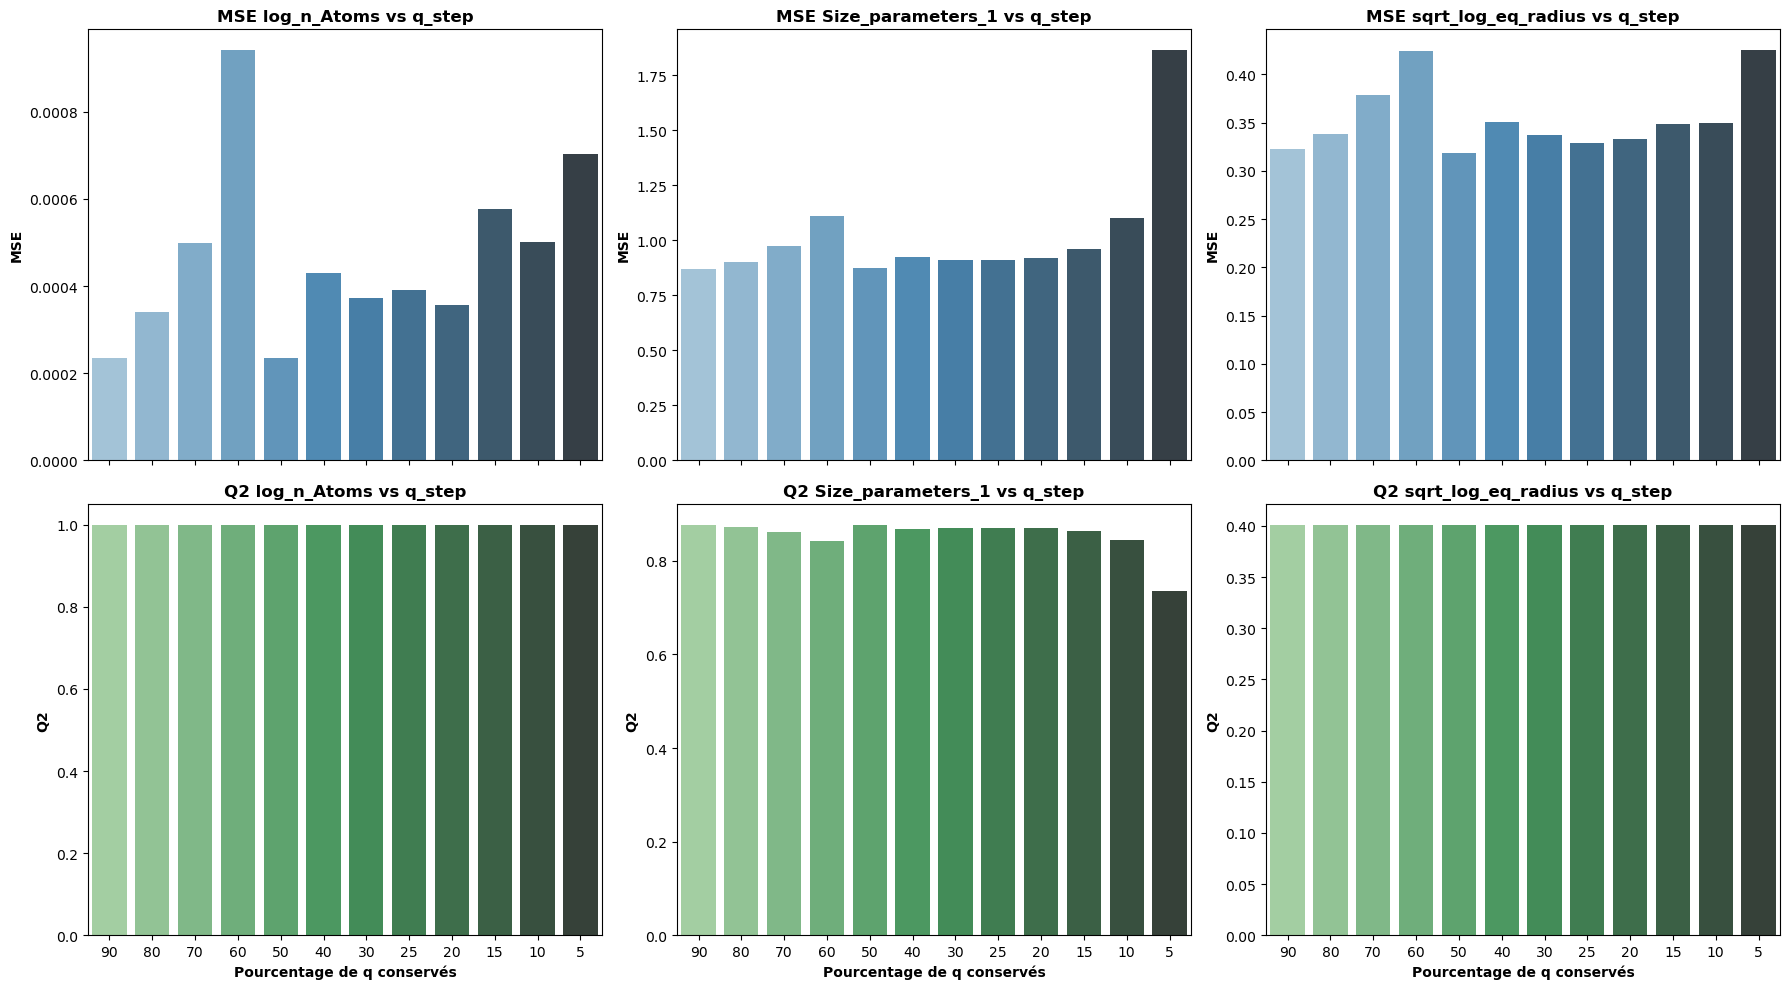

In [86]:
results_df['Pourcentage'] = pd.Categorical(results_df['Pourcentage'], categories=perc, ordered=True)

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Pourcentage', y=col, hue='Pourcentage', data=results_df, palette='Blues_d', ax=ax, legend = False)
    #ax.set_yscale('log')
    #ax.plot(results_df['Pourcentage'], results_df[col], marker='o')
    ax.set_title(f"{col} vs q_step", fontsize=12, fontweight='bold')
    ax.set_xlabel("Pourcentage de q conservés", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Pourcentage', y=col, hue='Pourcentage', data=results_df, palette='Greens_d', ax=ax, legend = False)
    #ax.set_yscale('log')
    #ax.plot(results_df['Pourcentage'], results_df[col], marker='o')
    ax.set_title(f"{col} vs q_step", fontsize=12, fontweight='bold')
    ax.set_xlabel("Pourcentage de q conservés", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

### Logistic models

In [87]:
def shape_models_with_less_data(df_log_intensities, perc):
    """
    Entraîne un modèle de classification de formes en réduisant progressivement la quantité de données d'entrée.
    
    Paramètres :
    - df_log_intensities (DataFrame) : Données de log-intensité.
    - perc (list) : Liste des pourcentages de colonnes à conserver pour chaque expérience.
    
    Retourne :
    - DataFrame contenant les pourcentages et l'accuracy obtenue sur le test.
    """
    acc = []
    label_encoder = LabelEncoder()
    y_shape = label_encoder.fit_transform(data['Shape'])

    for i in range(len(perc)):
        # Réduction de la taille des données
        df_fils = create_smaller_df(df_log_intensities, perc[i])

        # Division des données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(df_fils, y_shape, test_size=0.2, random_state=42)

        # Standardisation des données
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        # Entraînement du modèle de régression logistique
        logistic_model = LogisticRegression(max_iter=1000)
        logistic_model.fit(X_train, y_train)

        # Prédiction et évaluation des performances
        y_pred = logistic_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc.append(accuracy)
    
    # Création d'un DataFrame contenant les résultats
    df = pd.DataFrame({
        'Percentage': perc,
        'Test Accuracy': acc
    })
    
    return df


In [88]:
results_df = shape_models_with_less_data(df_log_intensities, perc)

In [89]:
results_df

,Percentage,Test Accuracy
0,90,0.993648
1,80,0.994555
2,70,0.991833
3,60,0.990018
4,50,0.990926
5,40,0.990926
6,30,0.985481
7,25,0.983666
8,20,0.974592
9,15,0.970054


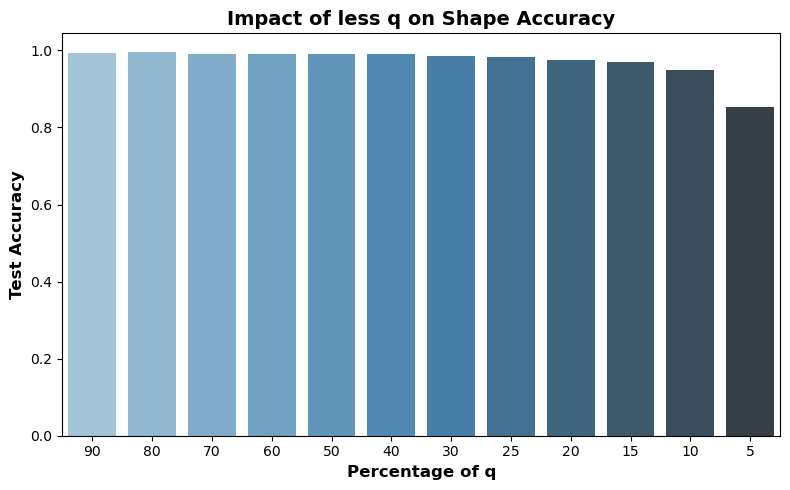

In [91]:
results_df['Percentage'] = pd.Categorical(results_df['Percentage'], categories=perc, ordered=True)

# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='Test Accuracy', hue='Percentage', data=results_df, palette='Blues_d',legend=False)

# Ajouter des labels et un titre
plt.xlabel("Percentage of q", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of less q on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Modèles entraînés sur des données bruitées

In [34]:
# On créer des nouveaux dataframe avec chacun un niveau de bruit différent

var = [0.01, 0.1, 0.5, 1, 5, 10, 15]

X = np.log(intensities_df)
new_df = []

for i in range(len(var)):
    adapt_noise = np.random.normal(0, var[i]**0.5, X.shape)
    X_noisy = X + adapt_noise
    new_df.append(X_noisy)

dfs = {
    '0.01': new_df[0],
    '0.1': new_df[1],
    '0.5': new_df[2],
    '1': new_df[3],
    '5': new_df[4],
    '10': new_df[5],
    '15': new_df[6]
}

### Prediction de la forme

Accuracy for 0.01: 0.9753086419753086

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.99      0.96      0.97       177
                cuboctahedron       0.94      0.89      0.92       160
dihedral_rhombic_dodecahedron       0.98      1.00      0.99       156
                 dodecahedron       0.99      1.00      0.99       155
                  icosahedron       1.00      0.99      1.00       160
                   octahedron       0.89      0.95      0.92       155
         pentagonal_bipyramid       1.00      0.99      0.99       100
         rhombic_dodecahedron       1.00      1.00      1.00       164
                  tetrahedron       1.00      1.00      1.00       150

                     accuracy                           0.98      1377
                    macro avg       0.98      0.98      0.98      1377
                 weighted avg       0.98      0.98      0.98      1377



<Figure size 400x400 with 0 Axes>

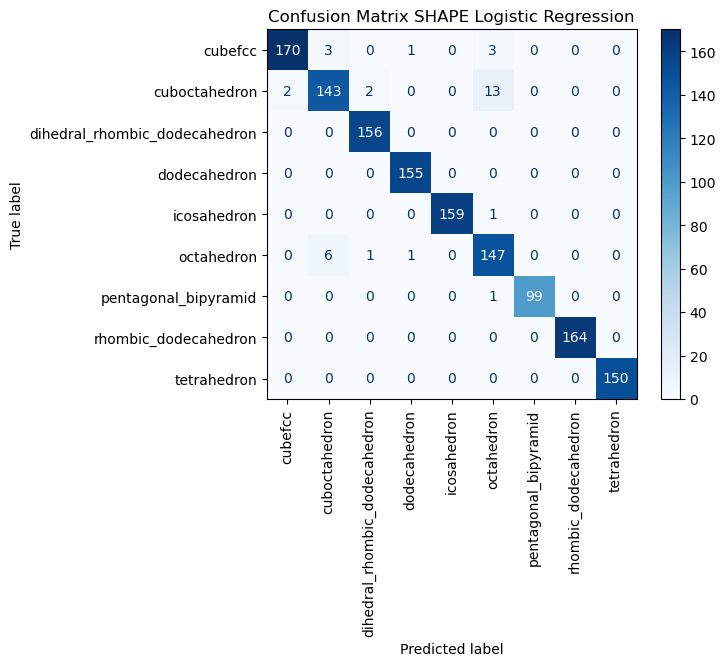

Accuracy for 0.1: 0.8772694262890341

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.87      0.77      0.82       177
                cuboctahedron       0.64      0.66      0.65       160
dihedral_rhombic_dodecahedron       0.93      0.97      0.95       156
                 dodecahedron       0.99      0.99      0.99       155
                  icosahedron       0.94      0.95      0.94       160
                   octahedron       0.70      0.75      0.72       155
         pentagonal_bipyramid       0.94      0.84      0.89       100
         rhombic_dodecahedron       0.96      0.98      0.97       164
                  tetrahedron       0.96      1.00      0.98       150

                     accuracy                           0.88      1377
                    macro avg       0.88      0.88      0.88      1377
                 weighted avg       0.88      0.88      0.88      1377



<Figure size 400x400 with 0 Axes>

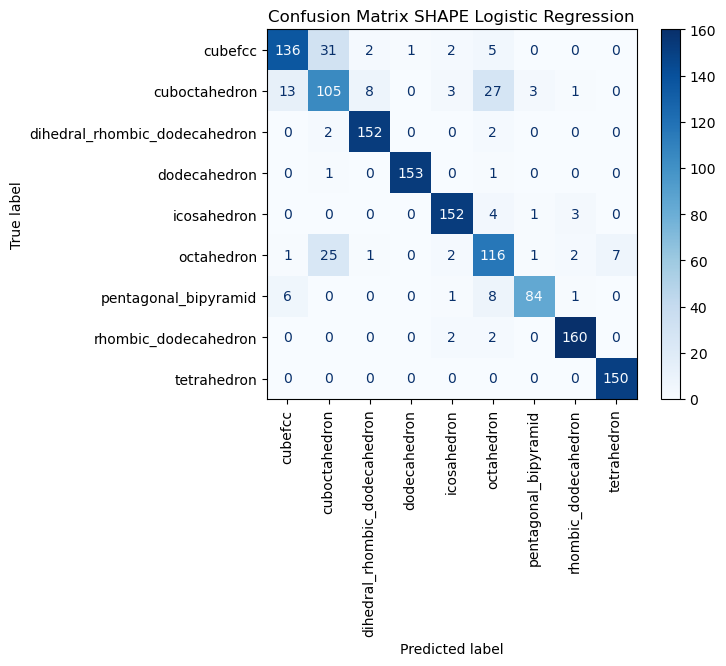

Accuracy for 0.5: 0.7109658678286129

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.57      0.51      0.54       177
                cuboctahedron       0.42      0.40      0.41       160
dihedral_rhombic_dodecahedron       0.72      0.80      0.76       156
                 dodecahedron       0.99      0.99      0.99       155
                  icosahedron       0.83      0.84      0.84       160
                   octahedron       0.46      0.46      0.46       155
         pentagonal_bipyramid       0.75      0.68      0.71       100
         rhombic_dodecahedron       0.85      0.85      0.85       164
                  tetrahedron       0.81      0.88      0.85       150

                     accuracy                           0.71      1377
                    macro avg       0.71      0.71      0.71      1377
                 weighted avg       0.71      0.71      0.71      1377



<Figure size 400x400 with 0 Axes>

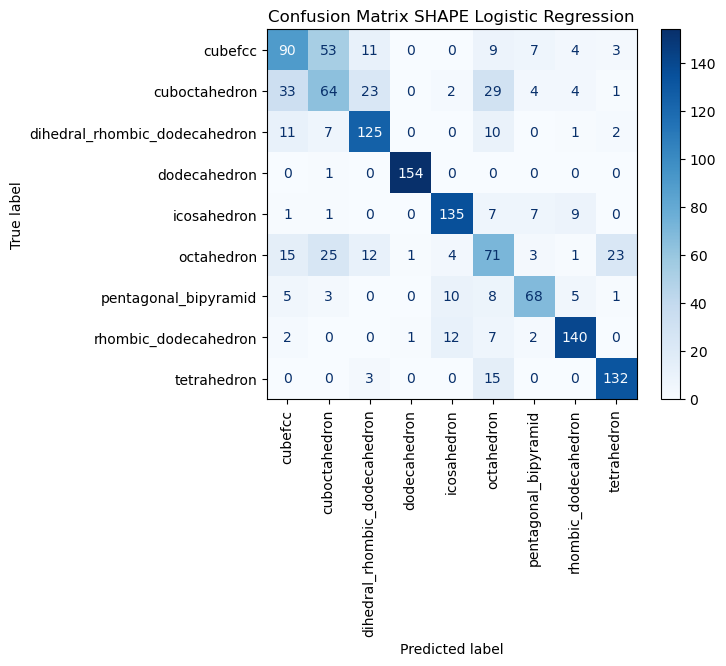

Accuracy for 1: 0.5846042120551924

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.45      0.42      0.43       177
                cuboctahedron       0.32      0.33      0.33       160
dihedral_rhombic_dodecahedron       0.60      0.56      0.58       156
                 dodecahedron       0.99      0.94      0.96       155
                  icosahedron       0.63      0.68      0.65       160
                   octahedron       0.30      0.36      0.33       155
         pentagonal_bipyramid       0.54      0.46      0.50       100
         rhombic_dodecahedron       0.77      0.73      0.75       164
                  tetrahedron       0.76      0.77      0.77       150

                     accuracy                           0.58      1377
                    macro avg       0.59      0.58      0.59      1377
                 weighted avg       0.59      0.58      0.59      1377



<Figure size 400x400 with 0 Axes>

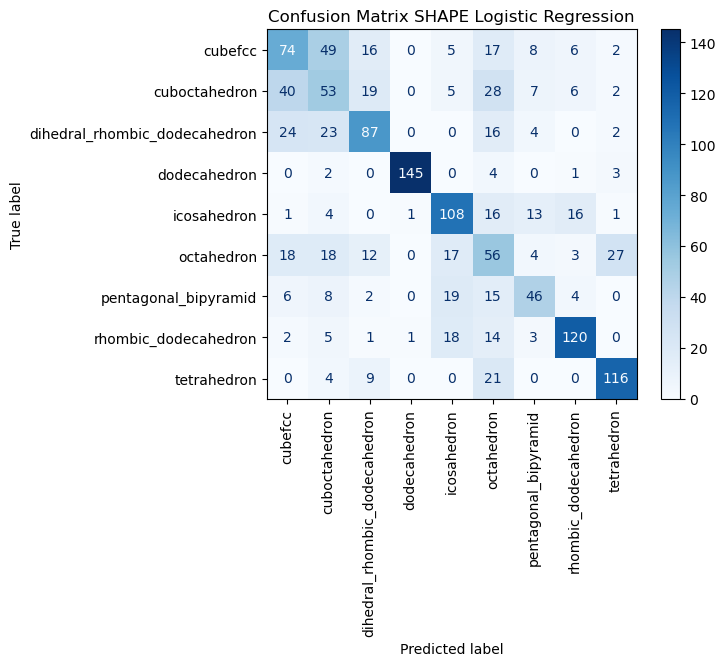

Accuracy for 5: 0.36673928830791575

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.20      0.20      0.20       177
                cuboctahedron       0.15      0.16      0.15       160
dihedral_rhombic_dodecahedron       0.39      0.38      0.38       156
                 dodecahedron       0.88      0.87      0.88       155
                  icosahedron       0.34      0.38      0.36       160
                   octahedron       0.20      0.26      0.23       155
         pentagonal_bipyramid       0.26      0.21      0.23       100
         rhombic_dodecahedron       0.41      0.36      0.38       164
                  tetrahedron       0.57      0.45      0.51       150

                     accuracy                           0.37      1377
                    macro avg       0.38      0.36      0.37      1377
                 weighted avg       0.38      0.37      0.37      1377



<Figure size 400x400 with 0 Axes>

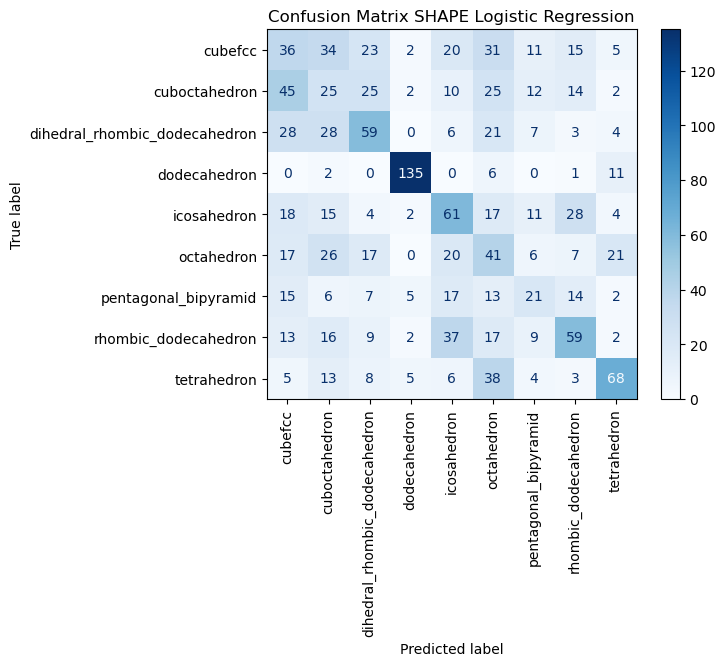

Accuracy for 10: 0.30501089324618735

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.22      0.21      0.21       177
                cuboctahedron       0.15      0.16      0.15       160
dihedral_rhombic_dodecahedron       0.26      0.25      0.26       156
                 dodecahedron       0.76      0.72      0.74       155
                  icosahedron       0.29      0.33      0.31       160
                   octahedron       0.16      0.20      0.18       155
         pentagonal_bipyramid       0.21      0.17      0.19       100
         rhombic_dodecahedron       0.36      0.31      0.33       164
                  tetrahedron       0.39      0.37      0.38       150

                     accuracy                           0.31      1377
                    macro avg       0.31      0.30      0.31      1377
                 weighted avg       0.31      0.31      0.31      1377



<Figure size 400x400 with 0 Axes>

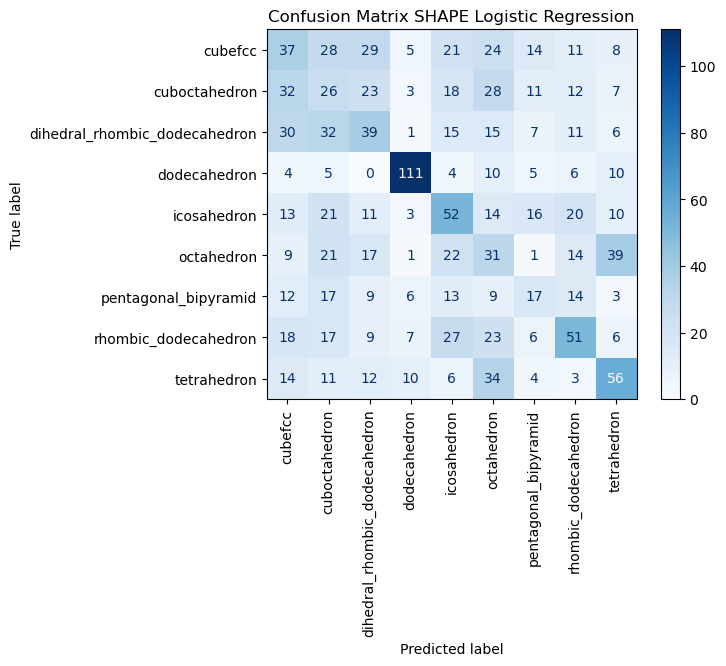

Accuracy for 15: 0.2716049382716049

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.15      0.13      0.14       177
                cuboctahedron       0.16      0.17      0.17       160
dihedral_rhombic_dodecahedron       0.27      0.24      0.26       156
                 dodecahedron       0.73      0.62      0.67       155
                  icosahedron       0.25      0.27      0.26       160
                   octahedron       0.13      0.17      0.15       155
         pentagonal_bipyramid       0.15      0.12      0.13       100
         rhombic_dodecahedron       0.31      0.30      0.30       164
                  tetrahedron       0.38      0.39      0.38       150

                     accuracy                           0.27      1377
                    macro avg       0.28      0.27      0.27      1377
                 weighted avg       0.28      0.27      0.28      1377



<Figure size 400x400 with 0 Axes>

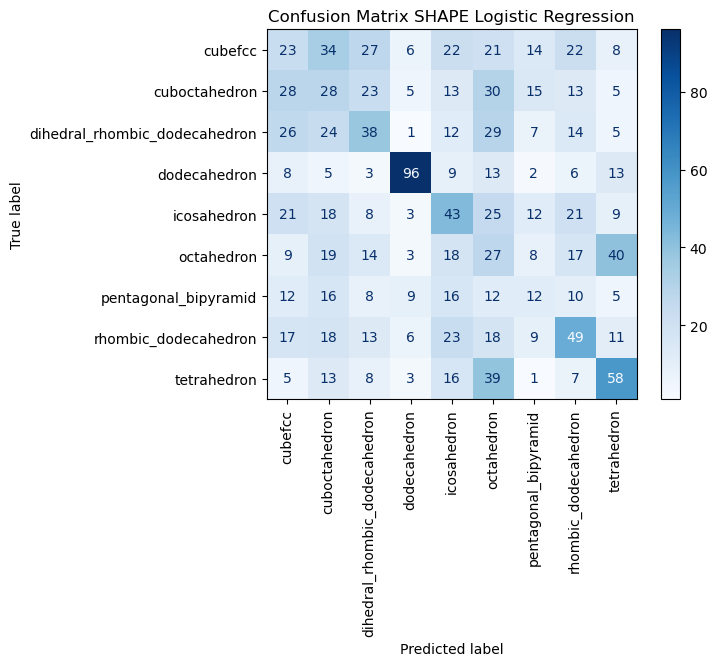

In [35]:
label_encoder = LabelEncoder()
y_shape = label_encoder.fit_transform(data['Shape'])
acc = []

# Énumération sur le dictionnaire de DataFrames
for name, df in dfs.items():
    # Division en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(df, y_shape, test_size=0.25, random_state=42)

    # Standardisation des inputs
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Entrainement du modèle
    logistic_model = LogisticRegression(max_iter=2000)
    logistic_model.fit(X_train, y_train)

    # Prédiction
    y_pred = logistic_model.predict(X_test)

    # Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(f'Accuracy for {name}: {accuracy}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    conf_matrix = confusion_matrix(y_test, y_pred)

    original_labels = label_encoder.classes_

    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=original_labels)
    plt.figure(figsize=(4,4))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix SHAPE Logistic Regression")
    plt.xticks(rotation=90)
    plt.show()

/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_11932/3901886283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variance', y='Test Accuracy', data=df, palette='Blues_d')


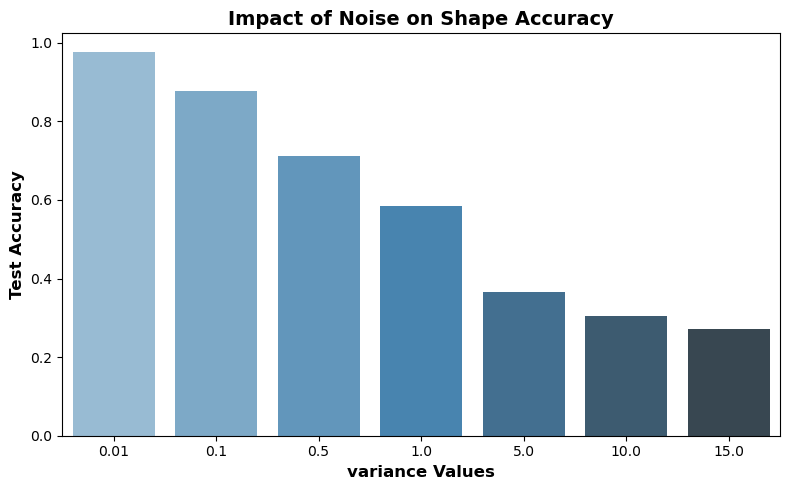

In [36]:
df = pd.DataFrame({
    'variance': var,
    'Test Accuracy': acc
})

# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='variance', y='Test Accuracy', data=df, palette='Blues_d')

# Ajouter des labels et un titre
plt.xlabel("variance Values", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of Noise on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

### Prediction de la taille

In [37]:
n_atoms_mse = []
size_1_mse = []
eq_radius_mse = []
Q2_n_atoms = []
Q2_size_1 = []
Q2_eqradius = []

# Standardisation des outputs
scaler_n_atoms_size_1 = StandardScaler()
n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

scaler_eq_radius = StandardScaler()
eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

# Concaténation des outputs
y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

# Énumération sur le dictionnaire de DataFrames
for name, df in dfs.items():
    print(f"Results for {name} : \n")

    # Division en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(df, y_scaled, test_size=0.25, random_state=42)

    # Standardisation des inputs
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Entraînement du modèle avec alpha=3
    ridge_opt = Ridge(alpha=3)
    ridge_opt.fit(X_train, y_train)

    # Prédictions
    y_pred = ridge_opt.predict(X_test)

    # Calcul de la RMSE sur l'échelle standardisée
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error : {mse:.5f} \n")

    # Inversion de la standardisation pour les prédictions et les valeurs réelles
    n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
    n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
    n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

    eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
    eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
    eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


    # Calculer la RMSE pour chaque paramètre sur l'échelle originale
    mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
    mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

    Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
    Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

    print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]}")
    print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]}")
    print(f"MSE pour sqrt_log_eq_radius : {mse_eq_radius} \n")

    print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]}")
    print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]}")
    print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius[0]} \n")
    print(f"\n")

    n_atoms_mse.append(mse_n_atoms_size_1[0])
    size_1_mse.append(mse_n_atoms_size_1[1])
    eq_radius_mse.append(mse_eq_radius)
    Q2_n_atoms.append(Q2_n_atoms_size_1[0])
    Q2_size_1.append(Q2_n_atoms_size_1[1])
    Q2_eqradius.append(Q2_eq_radius[0])

Results for 0.01 : 

Mean Squared Error : 0.24759 

MSE pour log_n_Atoms : 0.0016246116834474568
MSE pour Size_parameters_1 : 1.1920468668518753
MSE pour sqrt_log_eq_radius : 0.41683084772785334 

Q2 pour log_n_Atoms : 0.9994775294144158
Q2 pour Size_parameters_1 : 0.8314181505091166
Q2 pour sqrt_log_eq_radius : 0.4131529475564931 



Results for 0.1 : 

Mean Squared Error : 0.42180 

MSE pour log_n_Atoms : 0.015985813877552827
MSE pour Size_parameters_1 : 2.238274131702494
MSE pour sqrt_log_eq_radius : 0.6857755025565362 

Q2 pour log_n_Atoms : 0.9948590068489952
Q2 pour Size_parameters_1 : 0.683458424930456
Q2 pour sqrt_log_eq_radius : 0.03451163821727998 



Results for 0.5 : 

Mean Squared Error : 0.55725 

MSE pour log_n_Atoms : 0.06437943663990042
MSE pour Size_parameters_1 : 3.2002531005713153
MSE pour sqrt_log_eq_radius : 0.8711532621505734 

Q2 pour log_n_Atoms : 0.9792957527613889
Q2 pour Size_parameters_1 : 0.5474132758235875
Q2 pour sqrt_log_eq_radius : -0.22647766331677754

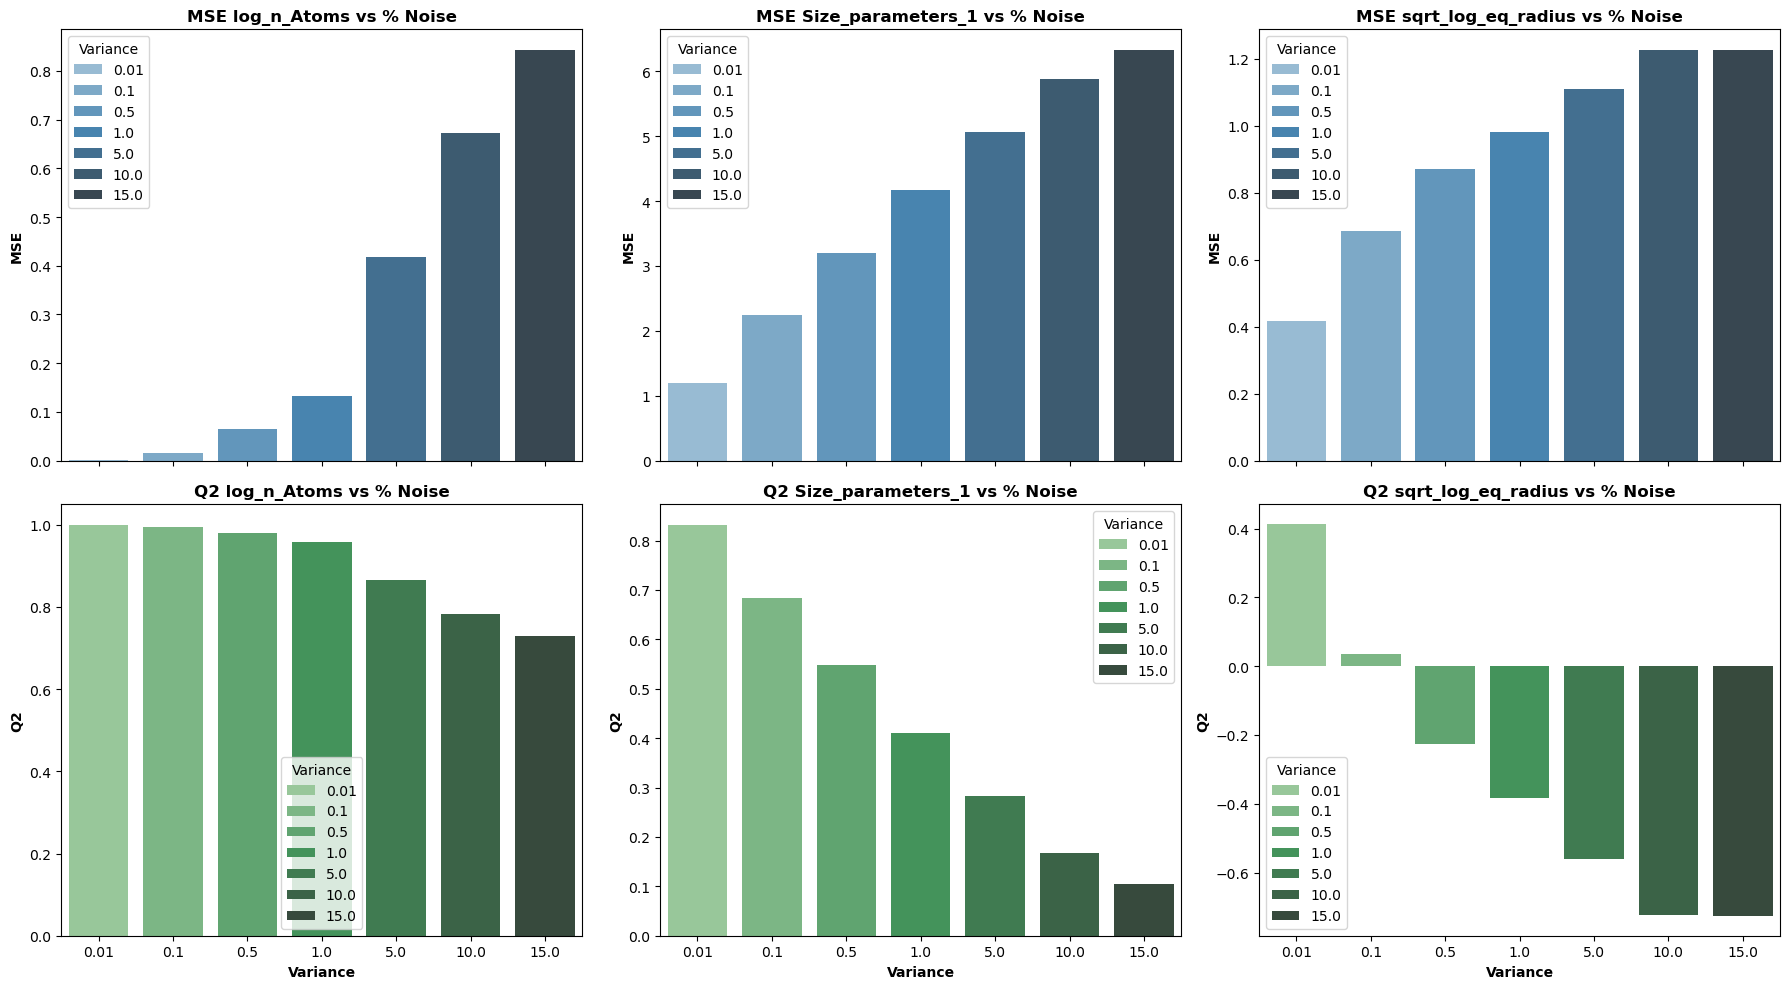

In [40]:
df = pd.DataFrame({
    'Variance': var,
    'MSE log_n_Atoms': n_atoms_mse,
    'MSE Size_parameters_1': size_1_mse,
    'MSE sqrt_log_eq_radius': eq_radius_mse,
    'Q2 log_n_Atoms': Q2_n_atoms,
    'Q2 Size_parameters_1': Q2_size_1,
    'Q2 sqrt_log_eq_radius': Q2_eqradius
})

df['Variance'] = pd.Categorical(df['Variance'], categories=sorted(var), ordered=True)

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Variance', y=col, hue='Variance', data=df, palette='Blues_d', ax=ax)
    #ax.set_yscale('log')
    ax.set_title(f"{col} vs % Noise", fontsize=12, fontweight='bold')
    ax.set_xlabel("Variance", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Variance', y=col, hue='Variance', data=df, palette='Greens_d', ax=ax)
    #ax.set_yscale('log')
    ax.set_title(f"{col} vs % Noise", fontsize=12, fontweight='bold')
    ax.set_xlabel("Variance", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

## Modèles entraînés sur des courbes trouées puis interpolées

In [70]:
def nan_plus_cubic_spline(df, perc):
    """
    Introduit des valeurs manquantes dans un DataFrame, puis les interpole avec un spline cubique.
    
    Paramètres :
    - df (DataFrame) : Jeu de données d'entrée.
    - perc (float) : Pourcentage de valeurs à rendre manquantes.
    
    Retourne :
    - DataFrame avec les valeurs interpolées.
    """
    X = df

    # Introduction de valeurs manquantes
    X_nan = introduce_nans(X, perc=perc)
    
    # Interpolation des valeurs manquantes avec une spline cubique
    X_interp = interpolate_with_q_spline(X_nan, q)
    
    return X_interp

### Prédiction de la forme

In [71]:
def shape_models_with_interpo_data(df_log_intensities, perc):
    """
    Entraîne un modèle de classification sur des données interpolées pour prédire la forme des objets.
    
    Paramètres :
    - df_log_intensities (DataFrame) : Données d'intensités en échelle logarithmique.
    - perc (list of float) : Liste des pourcentages de valeurs manquantes à introduire avant interpolation.
    
    Retourne :
    - DataFrame contenant les taux d'exactitude des modèles pour chaque pourcentage de valeurs manquantes.
    """
    acc = []
    label_encoder = LabelEncoder()
    y_shape = label_encoder.fit_transform(data['Shape'])

    for i in range(len(perc)):
        df_fils = nan_plus_cubic_spline(df_log_intensities, perc[i])

        # Division en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(df_fils, y_shape, test_size=0.25, random_state=42)

        # Standardisation des données
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        # Entraînement du modèle de régression logistique
        logistic_model = LogisticRegression(max_iter=1000)
        logistic_model.fit(X_train, y_train)

        # Prédictions et évaluation
        y_pred = logistic_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        acc.append(accuracy)

    df = pd.DataFrame({
        'Percentage': perc,
        'Test Accuracy': acc
    })
    
    return df

/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


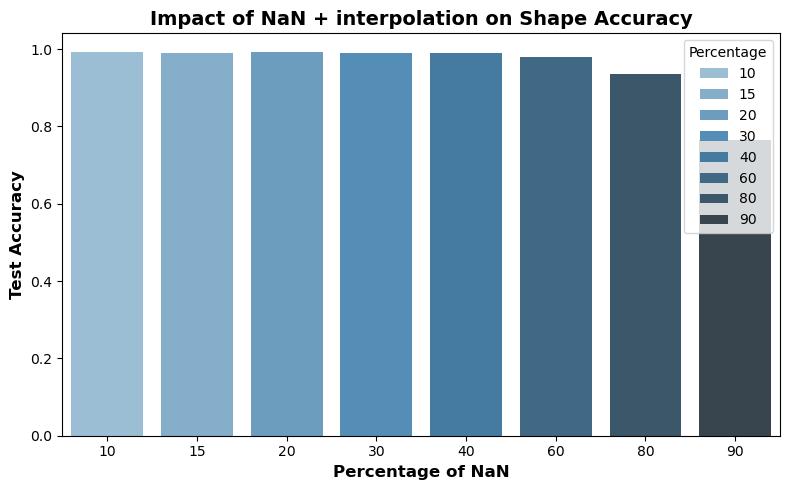

In [74]:
perc=[10,15,20,30,40,60,80,90]

results_df = shape_models_with_interpo_data(df_log_intensities, perc)
results_df['Percentage'] = pd.Categorical(results_df['Percentage'], categories=perc, ordered=True)

# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='Test Accuracy', hue='Percentage', data=results_df, palette='Blues_d',legend='full')

# Ajouter des labels et un titre
plt.xlabel("Percentage of NaN", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of NaN + interpolation on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [75]:
results_df

,Percentage,Test Accuracy
0,10,0.991285
1,15,0.990559
2,20,0.991285
3,30,0.989833
4,40,0.989833
5,60,0.980392
6,80,0.936093
7,90,0.766158


### Prédiction de la taille

In [76]:
def models_with_interpo_data(df_log_intensities, data_num, perc):
    """
    Entraîne un modèle de régression Ridge sur des données interpolées pour prédire des paramètres physiques.
    
    Paramètres :
    - df_log_intensities (DataFrame) : Données d'intensités en échelle logarithmique.
    - data_num (DataFrame) : Données numériques contenant les valeurs cibles.
    - perc (list of float) : Liste des pourcentages de valeurs manquantes à introduire avant interpolation.
    
    Retourne :
    - DataFrame contenant les MSE et Q² pour chaque paramètre et chaque pourcentage de valeurs manquantes.
    """
    mse_n_atoms = []
    mse_size_1 = []
    mse_eq_radius = []
    Q2_n_atoms = []
    Q2_size_1 = []
    Q2_eq_radius = []

    # Standardisation des valeurs cibles
    scaler_n_atoms_size_1 = StandardScaler()
    n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

    scaler_eq_radius = StandardScaler()
    eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

    # Concaténation des valeurs cibles
    y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

    for i in range(len(perc)):
        df_fils = nan_plus_cubic_spline(df_log_intensities, perc[i])

        # Division en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(df_fils, y_scaled, test_size=0.25, random_state=42)

        # Standardisation des entrées
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        # Recherche du meilleur hyperparamètre alpha pour Ridge
        param_grid = {"alpha": [3, 4, 5]}
        ridge_model = Ridge()
        grid_search = GridSearchCV(ridge_model, param_grid, cv=5, n_jobs=-1, scoring="r2")
        grid_search.fit(X_train, y_train)

        best_alpha = grid_search.best_params_["alpha"]
        best_score = grid_search.best_score_
        print(f"Pourcentage de NaN : {perc[i]}%, Meilleur alpha trouvé : {best_alpha}, Meilleur R2 sur validation croisée : {best_score:.5f}\n")

        # Entraînement du modèle avec le meilleur hyperparamètre
        ridge_opt = Ridge(alpha=best_alpha)
        ridge_opt.fit(X_train, y_train)

        # Prédictions
        y_pred = ridge_opt.predict(X_test)

        # Inversion de la standardisation des sorties
        n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
        n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
        n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

        eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
        eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
        eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))

        # Calcul des MSE et Q²
        mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
        mse_eqradius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

        Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
        Q2_eqradius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))[0]
        
        mse_n_atoms.append(mse_n_atoms_size_1[0])
        mse_size_1.append(mse_n_atoms_size_1[1])
        mse_eq_radius.append(mse_eqradius)
        Q2_n_atoms.append(Q2_n_atoms_size_1[0])
        Q2_size_1.append(Q2_n_atoms_size_1[1])
        Q2_eq_radius.append(Q2_eqradius)

    df = pd.DataFrame({
        'Pourcentage': perc,
        'MSE log_n_Atoms': mse_n_atoms,
        'MSE Size_parameters_1': mse_size_1,
        'MSE sqrt_log_eq_radius': mse_eq_radius,
        'Q2 log_n_Atoms': Q2_n_atoms,
        'Q2 Size_parameters_1': Q2_size_1,
        'Q2 sqrt_log_eq_radius': Q2_eq_radius
    })
    
    return df

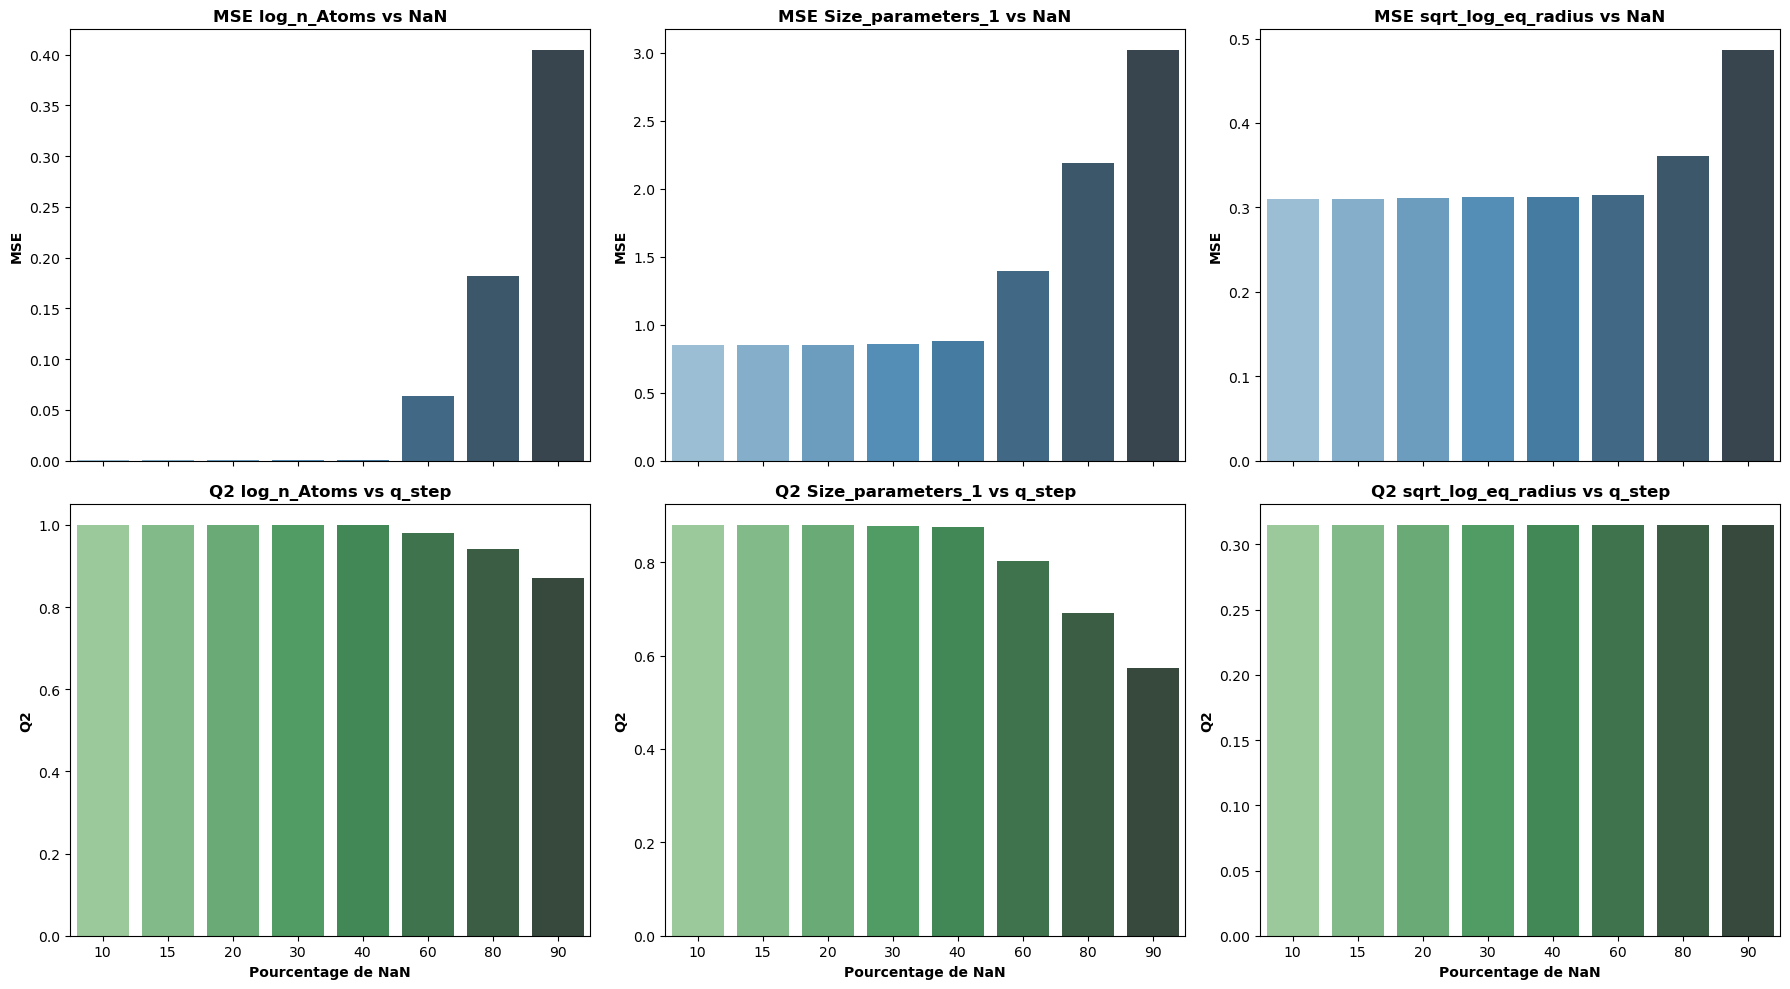

In [80]:
#results_df = models_with_interpo_data(df_log_intensities, data_num, perc)
#results_df['Pourcentage'] = pd.Categorical(results_df['Pourcentage'], categories=perc, ordered=True)

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Pourcentage', y=col, hue='Pourcentage', data=results_df, palette='Blues_d', ax=ax, legend = False)
    #ax.set_yscale('log')
    #ax.plot(results_df['Pourcentage'], results_df[col], marker='o')
    ax.set_title(f"{col} vs NaN", fontsize=12, fontweight='bold')
    ax.set_xlabel("Pourcentage de NaN", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Pourcentage', y=col, hue='Pourcentage', data=results_df, palette='Greens_d', ax=ax, legend = False)
    #ax.set_yscale('log')
    #ax.plot(results_df['Pourcentage'], results_df[col], marker='o')
    ax.set_title(f"{col} vs q_step", fontsize=12, fontweight='bold')
    ax.set_xlabel("Pourcentage de NaN", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [78]:
results_df

,Pourcentage,MSE log_n_Atoms,MSE Size_parameters_1,MSE sqrt_log_eq_radius,Q2 log_n_Atoms,Q2 Size_parameters_1,Q2 sqrt_log_eq_radius
0,10,0.000183,0.849636,0.309893,0.999941,0.879843,0.314918
1,15,0.000185,0.851364,0.310520,0.999941,0.879598,0.314918
2,20,0.000191,0.852878,0.311147,0.999939,0.879384,0.314918
3,30,0.000220,0.860087,0.311991,0.999929,0.878365,0.314918
4,40,0.000476,0.877733,0.312154,0.999847,0.875869,0.314918
5,60,0.063677,1.396709,0.314140,0.979522,0.802474,0.314918
6,80,0.182162,2.190370,0.360860,0.941417,0.690233,0.314918
7,90,0.404805,3.022796,0.486606,0.869816,0.572510,0.314918


## Modèles entraînés avec seulement la partie SAXS ou WAXS des courbes

In [39]:
X = np.log(intensities_df)
seuil=200
SAXS=X.iloc[:,:seuil]
WAXS=X.iloc[:,seuil:]

In [40]:
WAXS.shape, SAXS.shape

((5508, 1799), (5508, 200))

In [41]:
dfs = {'SAXS': SAXS, 'WAXS': WAXS}

### Prediction de shape

Accuracy for SAXS: 0.588961510530138

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.76      0.83      0.79       177
                cuboctahedron       0.42      0.26      0.32       160
dihedral_rhombic_dodecahedron       0.55      0.68      0.61       156
                 dodecahedron       0.79      0.92      0.85       155
                  icosahedron       0.59      0.57      0.58       160
                   octahedron       0.31      0.34      0.32       155
         pentagonal_bipyramid       0.48      0.60      0.54       100
         rhombic_dodecahedron       0.56      0.42      0.48       164
                  tetrahedron       0.70      0.68      0.69       150

                     accuracy                           0.59      1377
                    macro avg       0.58      0.59      0.58      1377
                 weighted avg       0.58      0.59      0.58      1377



<Figure size 400x400 with 0 Axes>

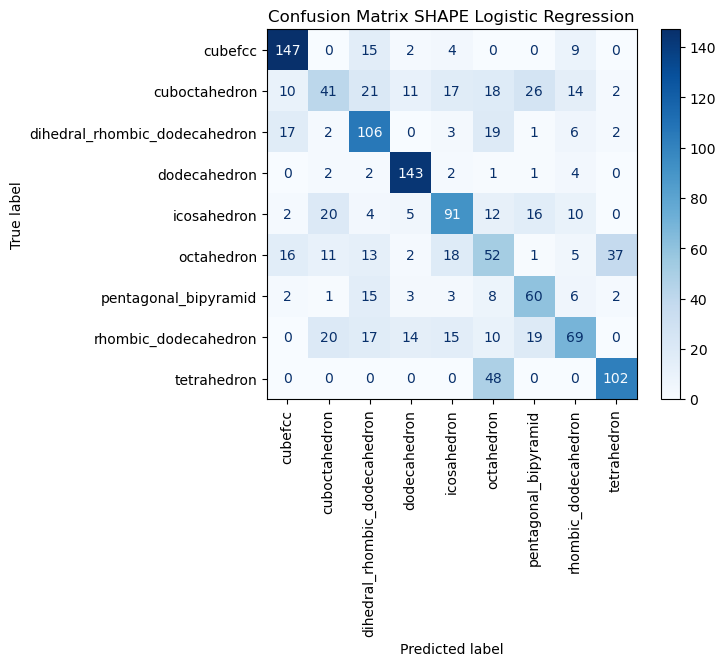

Accuracy for WAXS: 0.9041394335511983

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.96      0.93      0.95       177
                cuboctahedron       0.88      0.76      0.81       160
dihedral_rhombic_dodecahedron       0.92      1.00      0.96       156
                 dodecahedron       1.00      0.99      0.99       155
                  icosahedron       0.95      0.94      0.94       160
                   octahedron       0.75      0.75      0.75       155
         pentagonal_bipyramid       1.00      0.96      0.98       100
         rhombic_dodecahedron       1.00      0.97      0.98       164
                  tetrahedron       0.72      0.86      0.78       150

                     accuracy                           0.90      1377
                    macro avg       0.91      0.91      0.91      1377
                 weighted avg       0.91      0.90      0.90      1377



<Figure size 400x400 with 0 Axes>

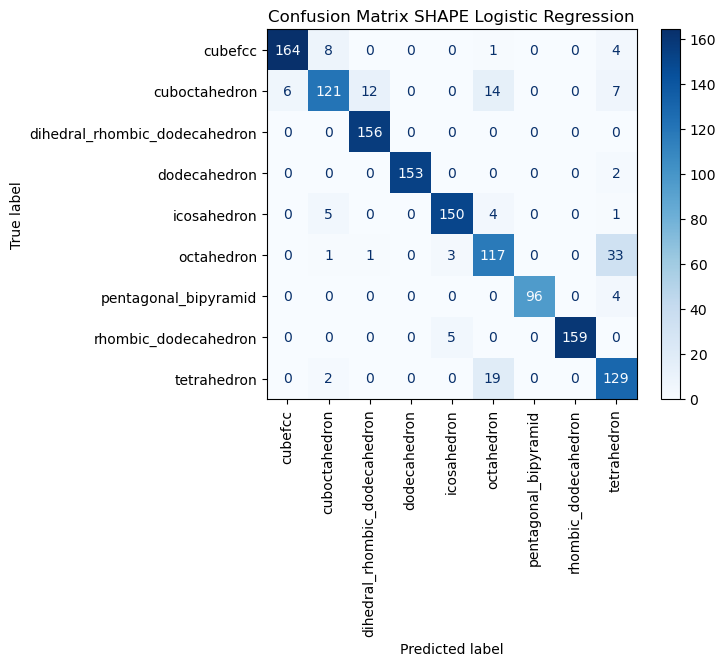

In [42]:
label_encoder = LabelEncoder()
y_shape = label_encoder.fit_transform(data['Shape'])

# Énumération sur le dictionnaire de DataFrames
for name, df in dfs.items():
    # Division en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(df, y_shape, test_size=0.25, random_state=42)

    # Standardisation des inputs
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Entrainement du modèle
    logistic_model = LogisticRegression(max_iter=2000)
    logistic_model.fit(X_train, y_train)

    # Prédiction
    y_pred = logistic_model.predict(X_test)

    # Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {name}: {accuracy}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    conf_matrix = confusion_matrix(y_test, y_pred)

    original_labels = label_encoder.classes_

    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=original_labels)
    plt.figure(figsize=(4,4))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix SHAPE Logistic Regression")
    plt.xticks(rotation=90)
    plt.show()

### Prediction de size

In [26]:
# Standardisation des outputs
scaler_n_atoms_size_1 = StandardScaler()
n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

scaler_eq_radius = StandardScaler()
eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

# Concaténation des outputs
y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

# Énumération sur le dictionnaire de DataFrames
for name, df in dfs.items():
    print(f"Results for {name} : \n")

    # Division en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(df, y_scaled, test_size=0.25, random_state=42)

    # Standardisation des inputs
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Entraînement du modèle avec alpha=3
    ridge_opt = Ridge(alpha=3)
    ridge_opt.fit(X_train, y_train)

    # Prédictions
    y_pred = ridge_opt.predict(X_test)

    # Calcul de la MSE sur l'échelle standardisée
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error : {mse:.5f} \n")

    # Inversion de la standardisation pour les prédictions et les valeurs réelles
    n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
    n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
    n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

    eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
    eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
    eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


    # Calculer la MSE et le Q2 pour chaque paramètre sur l'échelle originale
    mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
    mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

    Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
    Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

    print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]}")
    print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]}")
    print(f"MSE pour sqrt_log_eq_radius : {mse_eq_radius} \n")

    print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]}")
    print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]}")
    print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")

Results for SAXS : 

Mean Squared Error : 0.39198 

MSE pour log_n_Atoms : 0.029980811583610368
MSE pour Size_parameters_1 : 2.145082736388191
MSE pour sqrt_log_eq_radius : 0.6271786405280473 

Q2 pour log_n_Atoms : 0.9903582546254128
Q2 pour Size_parameters_1 : 0.6966377538776571
Q2 pour sqrt_log_eq_radius : [0.11700888]
Results for WAXS : 

Mean Squared Error : 0.25352 

MSE pour log_n_Atoms : 0.11519921256670178
MSE pour Size_parameters_1 : 2.0095059585235218
MSE pour sqrt_log_eq_radius : 0.3198965181745204 

Q2 pour log_n_Atoms : 0.962952254583786
Q2 pour Size_parameters_1 : 0.715811315417902
Q2 pour sqrt_log_eq_radius : [0.54962467]


## Modèles entraînés sur les courbes avec les extrémités nulles

In [18]:
def perf_function_conserve_block(df, conserve_percentage):
    """
    Conserve un bloc continu de la courbe correspondant à un pourcentage donné,
    place ce bloc à une position aléatoire et met les extrémités en dehors de ce bloc à 0.
    
    Arguments:
        df (pd.DataFrame): Les données (chaque ligne est une courbe).
        conserve_percentage (float): Le pourcentage de la courbe à conserver (0-100%).
    
    Retourne:
        pd.DataFrame: Un DataFrame transformé avec des blocs partiellement conservés.
    """
    # Initialiser un DataFrame rempli de zéros, avec la même structure que df
    block_df = pd.DataFrame(0.0, index=df.index, columns=df.columns)

    n_features = df.shape[1]
    block_length = int(conserve_percentage / 100 * n_features)  # Taille du bloc à conserver

    for i in range(df.shape[0]):  # Parcours des courbes (lignes)
        # Déterminer une position aléatoire pour le début du bloc
        start_idx = np.random.randint(0, n_features - block_length + 1)
        end_idx = start_idx + block_length

        # Copier les valeurs du bloc sélectionné dans le nouveau DataFrame
        block_df.iloc[i, start_idx:end_idx] = df.iloc[i, start_idx:end_idx]

    return block_df


### Prédiction de la taille

In [47]:
def models_with_cut_extr(df_log_intensities, data_num, perc):
    """
    Entraîne un modèle Ridge pour prédire trois variables cibles après standardisation.
    Expérimente avec différents pourcentages de réduction des extrémités des courbes en entrée.
    
    Paramètres:
    - df_log_intensities: DataFrame contenant les données d'intensité en échelle logarithmique.
    - data_num: DataFrame contenant les valeurs cibles à prédire.
    - perc: Liste des pourcentages de conservation des features après réduction (donc la taille du bloc central que l'on conserve).
    
    Retourne:
    - Un DataFrame contenant les erreurs quadratiques moyennes (MSE) et les scores Q2 pour chaque pourcentage.
    """
    mse_n_atoms = []
    mse_size_1 = []
    mse_eq_radius = []
    Q2_n_atoms = []
    Q2_size_1 = []
    Q2_eq_radius = []     

    # Standardisation des outputs
    scaler_n_atoms_size_1 = StandardScaler()
    n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

    scaler_eq_radius = StandardScaler()
    eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

    # Concaténation des outputs standardisés
    y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

    for i in range(len(perc)):
        # Réduction des features en entrée
        block_df = perf_function_conserve_block(df_log_intensities, perc[i])

        # Division en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(block_df, y_scaled, test_size=0.2, random_state=42)

        # Standardisation des inputs
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        # Définition de la grille d'hyperparamètres pour la recherche
        param_grid = {"alpha": [3, 4, 5]}

        # Recherche des meilleurs hyperparamètres avec validation croisée
        ridge_model = Ridge()
        grid_search = GridSearchCV(ridge_model, param_grid, cv=5, n_jobs=-1, scoring="r2")
        grid_search.fit(X_train, y_train)

        # Résultats de la recherche
        best_alpha = grid_search.best_params_["alpha"]
        best_score = grid_search.best_score_

        print(f"Pourcentage de q : {perc[i]}%, Meilleur alpha trouvé : {best_alpha}, Meilleur R2 sur validation croisée : {best_score:.5f} \n")

        # Entraînement du modèle avec le meilleur hyperparamètre
        ridge_opt = Ridge(alpha=best_alpha)
        ridge_opt.fit(X_train, y_train)

        # Prédictions
        y_pred = ridge_opt.predict(X_test)

        # Inversion de la standardisation pour les prédictions et les valeurs réelles
        n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
        n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
        n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

        eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
        eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
        eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))

        # Calcul des erreurs quadratiques moyennes (MSE) et des scores Q2
        mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
        mse_eqradius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

        Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
        Q2_eqradius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))[0]
        
        mse_n_atoms.append(mse_n_atoms_size_1[0])
        mse_size_1.append(mse_n_atoms_size_1[1])
        mse_eq_radius.append(mse_eqradius)
        Q2_n_atoms.append(Q2_n_atoms_size_1[0])
        Q2_size_1.append(Q2_n_atoms_size_1[1])
        Q2_eq_radius.append(Q2_eqradius) 

    df = pd.DataFrame({
        'Pourcentage': perc,
        'MSE log_n_Atoms': mse_n_atoms,
        'MSE Size_parameters_1': mse_size_1,
        'MSE sqrt_log_eq_radius': mse_eq_radius,
        'Q2 log_n_Atoms': Q2_n_atoms,
        'Q2 Size_parameters_1': Q2_size_1,
        'Q2 sqrt_log_eq_radius': Q2_eq_radius
    })
    
    return df
    

In [48]:
perc = [90, 80, 70, 60, 50, 40, 30, 20, 10]
results_df = models_with_cut_extr(df_log_intensities, data_num, perc)

Pourcentage de q : 90%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.71771 

Pourcentage de q : 80%, Meilleur alpha trouvé : 3, Meilleur R2 sur validation croisée : 0.63871 

Pourcentage de q : 70%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.50243 

Pourcentage de q : 60%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.39689 

Pourcentage de q : 50%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.30525 

Pourcentage de q : 40%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.26074 

Pourcentage de q : 30%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.20697 

Pourcentage de q : 20%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.14720 

Pourcentage de q : 10%, Meilleur alpha trouvé : 5, Meilleur R2 sur validation croisée : 0.06649 



In [49]:
results_df

,Pourcentage,MSE log_n_Atoms,MSE Size_parameters_1,MSE sqrt_log_eq_radius,Q2 log_n_Atoms,Q2 Size_parameters_1,Q2 sqrt_log_eq_radius
0,90,0.151708,2.047129,0.354427,0.952538,0.711972,-0.266292
1,80,0.305782,2.649514,0.434238,0.904337,0.627218,-0.266292
2,70,0.546863,3.262883,0.539357,0.828915,0.540918,-0.266292
3,60,0.770053,4.002242,0.662977,0.759090,0.436891,-0.266292
4,50,1.116914,4.369527,0.760419,0.650575,0.385215,-0.266292
5,40,1.261857,4.722601,0.830783,0.605230,0.335538,-0.266292
6,30,1.411456,5.398316,0.841848,0.558428,0.240466,-0.266292
7,20,1.621385,5.706181,0.891713,0.492752,0.197150,-0.266292
8,10,1.714106,6.010283,0.881143,0.463744,0.154363,-0.266292


In [50]:
results_df.describe()

,Pourcentage,MSE log_n_Atoms,MSE Size_parameters_1,MSE sqrt_log_eq_radius,Q2 log_n_Atoms,Q2 Size_parameters_1,Q2 sqrt_log_eq_radius
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50.000000,0.988903,4.240964,0.688545,0.690623,0.403303,-0.266292
std,27.386128,0.570771,1.379519,0.202017,0.178565,0.194096,0.000000
min,10.000000,0.151708,2.047129,0.354427,0.463744,0.154363,-0.266292
25%,30.000000,0.546863,3.262883,0.539357,0.558428,0.240466,-0.266292
50%,50.000000,1.116914,4.369527,0.760419,0.650575,0.385215,-0.266292
75%,70.000000,1.411456,5.398316,0.841848,0.828915,0.540918,-0.266292
max,90.000000,1.714106,6.010283,0.891713,0.952538,0.711972,-0.266292


/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/2588627240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pourcentage', y=col, data=results_df, palette='Blues_d', ax=ax)
/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/2588627240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pourcentage', y=col, data=results_df, palette='Blues_d', ax=ax)
/var/folders/7t/9dnhhbt90p7btnw5vtfl4_tr0000gn/T/ipykernel_17401/2588627240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pourcentage', y=col, da

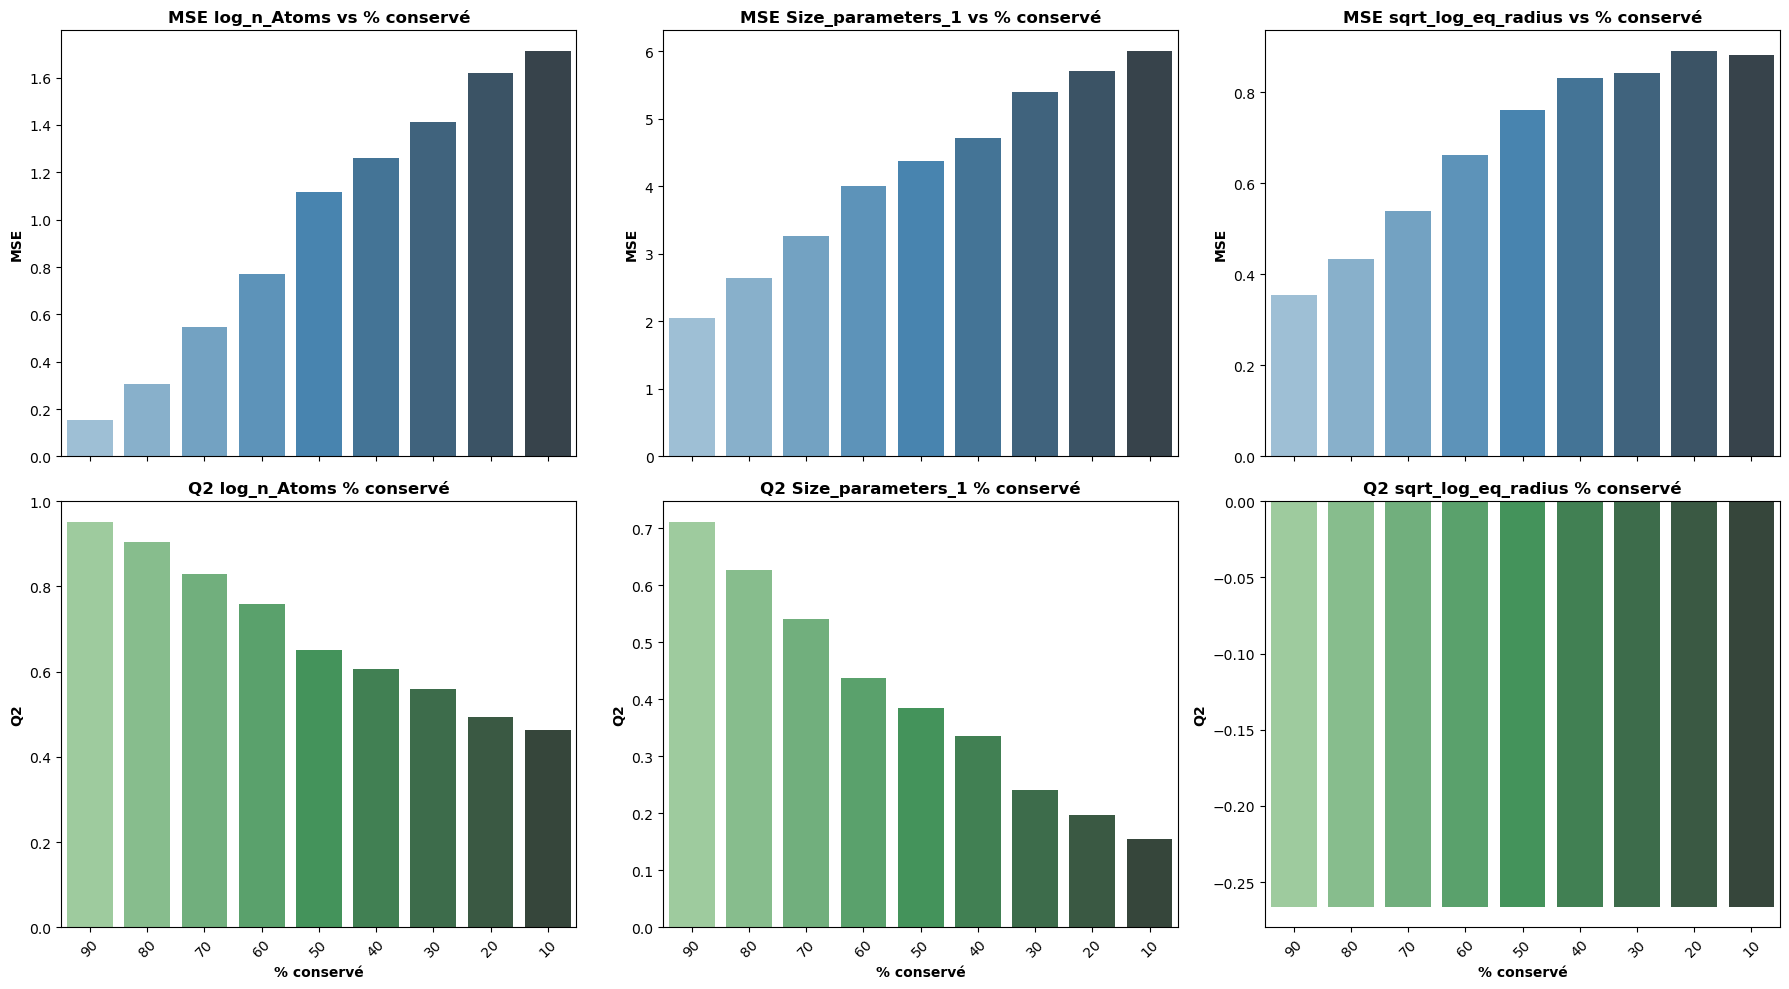

In [51]:
# Trier les pourcentages dans l'ordre décroissant
results_df['Pourcentage'] = pd.Categorical(results_df['Pourcentage'], categories=sorted(perc, reverse=True), ordered=True)

# Liste des colonnes pour les MSE et les Q2
mse_columns = ['MSE log_n_Atoms', 'MSE Size_parameters_1', 'MSE sqrt_log_eq_radius']
q2_columns = ['Q2 log_n_Atoms', 'Q2 Size_parameters_1', 'Q2 sqrt_log_eq_radius']

# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=False)

# Boucle pour les MSE
for ax, col in zip(axes[0], mse_columns):
    sns.barplot(x='Pourcentage', y=col, data=results_df, palette='Blues_d', ax=ax)
    #ax.set_yscale('log')
    ax.set_title(f"{col} vs % conservé", fontsize=12, fontweight='bold')
    ax.set_xlabel("% conservé", fontsize=10, fontweight='bold')
    ax.set_ylabel("MSE", fontsize=10, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

# Boucle pour les Q2
for ax, col in zip(axes[1], q2_columns):
    sns.barplot(x='Pourcentage', y=col, data=results_df, palette='Greens_d', ax=ax)
    #ax.set_yscale('log')
    ax.set_title(f"{col} % conservé", fontsize=12, fontweight='bold')
    ax.set_xlabel("% conservé", fontsize=10, fontweight='bold')
    ax.set_ylabel("Q2", fontsize=10, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

### Prédiction de la forme

In [19]:
def shape_models_with_cut_extr(df_log_intensities, perc):
    """
    Entraîne un modèle de régression logistique pour prédire la forme des nanoparticules.
    Expérimente avec différents pourcentages de réduction des extrémités des courbes en entrée.
    
    Paramètres:
    - df_log_intensities: DataFrame contenant les données d'intensité en échelle logarithmique.
    - perc: Liste des pourcentages de conservation des features après réduction (donc la taille du bloc central que l'on conserve).
    
    Retourne:
    - Un DataFrame contenant l'exactitude du modèle pour chaque pourcentage.
    """
    acc = []
    label_encoder = LabelEncoder()
    y_shape = label_encoder.fit_transform(data['Shape'])

    for i in range(len(perc)):
        # Réduction des features en entrée
        block_df = perf_function_conserve_block(df_log_intensities, perc[i])

        # Division en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(block_df, y_shape, test_size=0.2, random_state=42)

        # Standardisation des inputs
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        # Entraînement du modèle de régression logistique
        logistic_model = LogisticRegression(max_iter=1000)
        logistic_model.fit(X_train, y_train)

        # Prédictions et calcul de l'exactitude
        y_pred = logistic_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        acc.append(accuracy)

    df = pd.DataFrame({
        'Percentage': perc,
        'Test Accuracy': acc
    })
    
    return df

In [20]:
perc = [90, 80, 70, 60, 50, 40, 30, 20, 10]
results_df = shape_models_with_cut_extr(df_log_intensities, perc)

/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [21]:
results_df

,Percentage,Test Accuracy
0,90,0.848457
1,80,0.646098
2,70,0.559891
3,60,0.440109
4,50,0.325771
5,40,0.285844
6,30,0.215064
7,20,0.176044
8,10,0.158802


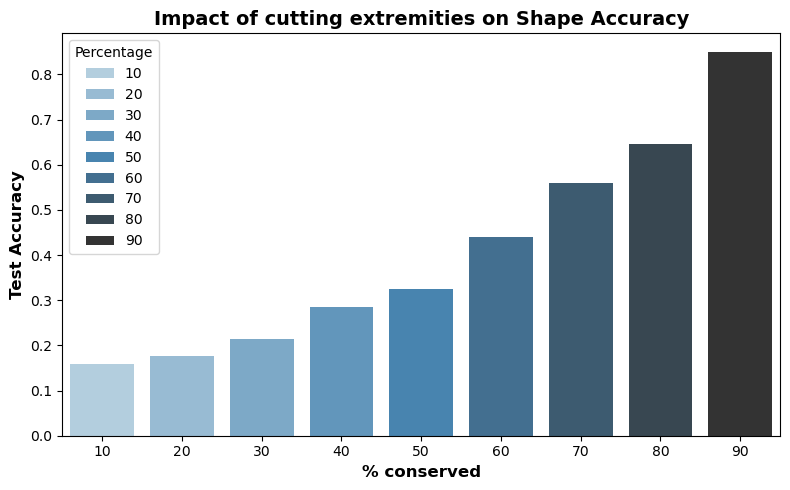

In [24]:
# Tracer un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='Test Accuracy', hue='Percentage', data=results_df, palette='Blues_d',legend='full')

# Ajouter des labels et un titre
plt.xlabel("% conserved", fontsize=12, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, fontweight='bold')
plt.title("Impact of cutting extremities on Shape Accuracy", fontsize=14, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()